In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## Data Cleaning and Sorting
### Covid Data

In [2]:
cd = pd.read_csv('phe_cases_london_boroughs.csv')

In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27584 entries, 0 to 27583
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area_name    27584 non-null  object
 1   area_code    27584 non-null  object
 2   date         27584 non-null  object
 3   new_cases    27584 non-null  int64 
 4   total_cases  27584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [4]:
cd.head()

,area_name,area_code,date,new_cases,total_cases
0,Barking and Dagenham,E09000002,2020/2/3,0,0
1,Barnet,E09000003,2020/2/3,0,0
2,Bexley,E09000004,2020/2/3,0,0
3,Brent,E09000005,2020/2/3,0,0
4,Bromley,E09000006,2020/2/3,0,0


In [5]:
cd2=cd[cd.area_code=='E09000002']

cd2["Barking_and_Dagenham_new_cases"] = cd2["new_cases"]
cd2["Barking_and_Dagenham_total_cases"] = cd2["total_cases"]
cd2.drop('new_cases', inplace=True, axis=1)
cd2.drop('total_cases', inplace=True, axis=1)
cd2.drop('area_code', inplace=True, axis=1)
cd2.drop('area_name', inplace=True, axis=1)

cd3=cd[cd.area_code=='E09000003']

cd3["Barnet_new_cases"] = cd3["new_cases"]
cd3["Barnet_total_cases"] = cd3["total_cases"]
cd3.drop('new_cases', inplace=True, axis=1)
cd3.drop('total_cases', inplace=True, axis=1)
cd3.drop('area_code', inplace=True, axis=1)
cd3.drop('area_name', inplace=True, axis=1)

cd4=cd[cd.area_code=='E09000004']

cd4["Bexley_new_cases"] = cd4["new_cases"]
cd4["Bexley_total_cases"] = cd4["total_cases"]
cd4.drop('new_cases', inplace=True, axis=1)
cd4.drop('total_cases', inplace=True, axis=1)
cd4.drop('area_code', inplace=True, axis=1)
cd4.drop('area_name', inplace=True, axis=1)

cd5=cd[cd.area_code=='E09000005']

cd5["Brent_new_cases"] = cd5["new_cases"]
cd5["Brent_total_cases"] = cd5["total_cases"]
cd5.drop('new_cases', inplace=True, axis=1)
cd5.drop('total_cases', inplace=True, axis=1)
cd5.drop('area_code', inplace=True, axis=1)
cd5.drop('area_name', inplace=True, axis=1)

cd6=cd[cd.area_code=='E09000006']

cd6["Bromley_new_cases"] = cd6["new_cases"]
cd6["Bromley_total_cases"] = cd6["total_cases"]
cd6.drop('new_cases', inplace=True, axis=1)
cd6.drop('total_cases', inplace=True, axis=1)
cd6.drop('area_code', inplace=True, axis=1)
cd6.drop('area_name', inplace=True, axis=1)

cd7=cd[cd.area_code=='E09000007']

cd7["Camden_new_cases"] = cd7["new_cases"]
cd7["Camden_total_cases"] = cd7["total_cases"]
cd7.drop('new_cases', inplace=True, axis=1)
cd7.drop('total_cases', inplace=True, axis=1)
cd7.drop('area_code', inplace=True, axis=1)
cd7.drop('area_name', inplace=True, axis=1)

cd8=cd[cd.area_code=='E09000008']

cd8["Croydon_new_cases"] = cd8["new_cases"]
cd8["Croydon_total_cases"] = cd8["total_cases"]
cd8.drop('new_cases', inplace=True, axis=1)
cd8.drop('total_cases', inplace=True, axis=1)
cd8.drop('area_code', inplace=True, axis=1)
cd8.drop('area_name', inplace=True, axis=1)

cd9=cd[cd.area_code=='E09000009']

cd9["Ealing_new_cases"] = cd9["new_cases"]
cd9["Ealing_total_cases"] = cd9["total_cases"]
cd9.drop('new_cases', inplace=True, axis=1)
cd9.drop('total_cases', inplace=True, axis=1)
cd9.drop('area_code', inplace=True, axis=1)
cd9.drop('area_name', inplace=True, axis=1)

cd10=cd[cd.area_code=='E09000010']

cd10["Enfield_new_cases"] = cd10["new_cases"]
cd10["Enfield_total_cases"] = cd10["total_cases"]
cd10.drop('new_cases', inplace=True, axis=1)
cd10.drop('total_cases', inplace=True, axis=1)
cd10.drop('area_code', inplace=True, axis=1)
cd10.drop('area_name', inplace=True, axis=1)

cd11=cd[cd.area_code=='E09000011']

cd11["Greenwich_new_cases"] = cd11["new_cases"]
cd11["Greenwich_total_cases"] = cd11["total_cases"]
cd11.drop('new_cases', inplace=True, axis=1)
cd11.drop('total_cases', inplace=True, axis=1)
cd11.drop('area_code', inplace=True, axis=1)
cd11.drop('area_name', inplace=True, axis=1)

cd12=cd[cd.area_code=='E09000012']

cd12["Hackney_and_City_of_London_new_cases"] = cd12["new_cases"]
cd12["Hackney_and_City_of_London_total_cases"] = cd12["total_cases"]
cd12.drop('new_cases', inplace=True, axis=1)
cd12.drop('total_cases', inplace=True, axis=1)
cd12.drop('area_code', inplace=True, axis=1)
cd12.drop('area_name', inplace=True, axis=1)

cd13=cd[cd.area_code=='E09000013']

cd13["Hammersmith_and_Fulham_new_cases"] = cd13["new_cases"]
cd13["Hammersmith_and_Fulham_total_cases"] = cd13["total_cases"]
cd13.drop('new_cases', inplace=True, axis=1)
cd13.drop('total_cases', inplace=True, axis=1)
cd13.drop('area_code', inplace=True, axis=1)
cd13.drop('area_name', inplace=True, axis=1)

cd14=cd[cd.area_code=='E09000014']

cd14["Haringey_new_cases"] = cd14["new_cases"]
cd14["Haringey_total_cases"] = cd14["total_cases"]
cd14.drop('new_cases', inplace=True, axis=1)
cd14.drop('total_cases', inplace=True, axis=1)
cd14.drop('area_code', inplace=True, axis=1)
cd14.drop('area_name', inplace=True, axis=1)

cd15=cd[cd.area_code=='E09000015']

cd15["Harrow_new_cases"] = cd15["new_cases"]
cd15["Harrow_total_cases"] = cd15["total_cases"]
cd15.drop('new_cases', inplace=True, axis=1)
cd15.drop('total_cases', inplace=True, axis=1)
cd15.drop('area_code', inplace=True, axis=1)
cd15.drop('area_name', inplace=True, axis=1)

cd16=cd[cd.area_code=='E09000016']

cd16["Havering_new_cases"] = cd16["new_cases"]
cd16["Havering_total_cases"] = cd16["total_cases"]
cd16.drop('new_cases', inplace=True, axis=1)
cd16.drop('total_cases', inplace=True, axis=1)
cd16.drop('area_code', inplace=True, axis=1)
cd16.drop('area_name', inplace=True, axis=1)

cd17=cd[cd.area_code=='E09000017']

cd17["Hillingdon_new_cases"] = cd17["new_cases"]
cd17["Hillingdon_total_cases"] = cd17["total_cases"]
cd17.drop('new_cases', inplace=True, axis=1)
cd17.drop('total_cases', inplace=True, axis=1)
cd17.drop('area_code', inplace=True, axis=1)
cd17.drop('area_name', inplace=True, axis=1)

cd18=cd[cd.area_code=='E09000018']

cd18["Hounslow_new_cases"] = cd18["new_cases"]
cd18["Hounslow_total_cases"] = cd18["total_cases"]
cd18.drop('new_cases', inplace=True, axis=1)
cd18.drop('total_cases', inplace=True, axis=1)
cd18.drop('area_code', inplace=True, axis=1)
cd18.drop('area_name', inplace=True, axis=1)

cd19=cd[cd.area_code=='E09000019']

cd19["Islington_new_cases"] = cd19["new_cases"]
cd19["Islington_total_cases"] = cd19["total_cases"]
cd19.drop('new_cases', inplace=True, axis=1)
cd19.drop('total_cases', inplace=True, axis=1)
cd19.drop('area_code', inplace=True, axis=1)
cd19.drop('area_name', inplace=True, axis=1)

cd20=cd[cd.area_code=='E09000020']

cd20["Kensington_and_Chelsea_new_cases"] = cd20["new_cases"]
cd20["Kensington_and_Chelsea_total_cases"] = cd20["total_cases"]
cd20.drop('new_cases', inplace=True, axis=1)
cd20.drop('total_cases', inplace=True, axis=1)
cd20.drop('area_code', inplace=True, axis=1)
cd20.drop('area_name', inplace=True, axis=1)

cd21=cd[cd.area_code=='E09000021']

cd21["Kingston_upon_Thames_new_cases"] = cd21["new_cases"]
cd21["Kingston_upon_Thames_total_cases"] = cd21["total_cases"]
cd21.drop('new_cases', inplace=True, axis=1)
cd21.drop('total_cases', inplace=True, axis=1)
cd21.drop('area_code', inplace=True, axis=1)
cd21.drop('area_name', inplace=True, axis=1)

cd22=cd[cd.area_code=='E09000022']

cd22["Lambeth_new_cases"] = cd22["new_cases"]
cd22["Lambeth_total_cases"] = cd22["total_cases"]
cd22.drop('new_cases', inplace=True, axis=1)
cd22.drop('total_cases', inplace=True, axis=1)
cd22.drop('area_code', inplace=True, axis=1)
cd22.drop('area_name', inplace=True, axis=1)

cd23=cd[cd.area_code=='E09000023']

cd23["Lewisham_new_cases"] = cd23["new_cases"]
cd23["Lewisham_total_cases"] = cd23["total_cases"]
cd23.drop('new_cases', inplace=True, axis=1)
cd23.drop('total_cases', inplace=True, axis=1)
cd23.drop('area_code', inplace=True, axis=1)
cd23.drop('area_name', inplace=True, axis=1)

cd24=cd[cd.area_code=='E09000024']

cd24["Merton_new_cases"] = cd24["new_cases"]
cd24["Merton_total_cases"] = cd24["total_cases"]
cd24.drop('new_cases', inplace=True, axis=1)
cd24.drop('total_cases', inplace=True, axis=1)
cd24.drop('area_code', inplace=True, axis=1)
cd24.drop('area_name', inplace=True, axis=1)

cd25=cd[cd.area_code=='E09000025']

cd25["Newham_new_cases"] = cd25["new_cases"]
cd25["Newham_total_cases"] = cd25["total_cases"]
cd25.drop('new_cases', inplace=True, axis=1)
cd25.drop('total_cases', inplace=True, axis=1)
cd25.drop('area_code', inplace=True, axis=1)
cd25.drop('area_name', inplace=True, axis=1)

cd26=cd[cd.area_code=='E09000026']

cd26["Redbridge_new_cases"] = cd26["new_cases"]
cd26["Redbridge_total_cases"] = cd26["total_cases"]
cd26.drop('new_cases', inplace=True, axis=1)
cd26.drop('total_cases', inplace=True, axis=1)
cd26.drop('area_code', inplace=True, axis=1)
cd26.drop('area_name', inplace=True, axis=1)

cd27=cd[cd.area_code=='E09000027']

cd27["Richmond_upon_Thames_new_cases"] = cd27["new_cases"]
cd27["Richmond_upon_Thames_total_cases"] = cd27["total_cases"]
cd27.drop('new_cases', inplace=True, axis=1)
cd27.drop('total_cases', inplace=True, axis=1)
cd27.drop('area_code', inplace=True, axis=1)
cd27.drop('area_name', inplace=True, axis=1)

cd28=cd[cd.area_code=='E09000028']

cd28["Southwark_new_cases"] = cd28["new_cases"]
cd28["Southwark_total_cases"] = cd28["total_cases"]
cd28.drop('new_cases', inplace=True, axis=1)
cd28.drop('total_cases', inplace=True, axis=1)
cd28.drop('area_code', inplace=True, axis=1)
cd28.drop('area_name', inplace=True, axis=1)

cd29=cd[cd.area_code=='E09000029']

cd29["Sutton_new_cases"] = cd29["new_cases"]
cd29["Sutton_total_cases"] = cd29["total_cases"]
cd29.drop('new_cases', inplace=True, axis=1)
cd29.drop('total_cases', inplace=True, axis=1)
cd29.drop('area_code', inplace=True, axis=1)
cd29.drop('area_name', inplace=True, axis=1)

cd30=cd[cd.area_code=='E09000030']

cd30["Tower_Hamlets_new_cases"] = cd30["new_cases"]
cd30["Tower_Hamlets_total_cases"] = cd30["total_cases"]
cd30.drop('new_cases', inplace=True, axis=1)
cd30.drop('total_cases', inplace=True, axis=1)
cd30.drop('area_code', inplace=True, axis=1)
cd30.drop('area_name', inplace=True, axis=1)

cd31=cd[cd.area_code=='E09000031']

cd31["Waltham_Forest_new_cases"] = cd31["new_cases"]
cd31["Waltham_Forest_total_cases"] = cd31["total_cases"]
cd31.drop('new_cases', inplace=True, axis=1)
cd31.drop('total_cases', inplace=True, axis=1)
cd31.drop('area_code', inplace=True, axis=1)
cd31.drop('area_name', inplace=True, axis=1)

cd32=cd[cd.area_code=='E09000032']

cd32["Wandsworth_new_cases"] = cd32["new_cases"]
cd32["Wandsworth_total_cases"] = cd32["total_cases"]
cd32.drop('new_cases', inplace=True, axis=1)
cd32.drop('total_cases', inplace=True, axis=1)
cd32.drop('area_code', inplace=True, axis=1)
cd32.drop('area_name', inplace=True, axis=1)

cd33=cd[cd.area_code=='E09000033']

cd33["Westminster_new_cases"] = cd33["new_cases"]
cd33["Westminster_total_cases"] = cd33["total_cases"]
cd33.drop('new_cases', inplace=True, axis=1)
cd33.drop('total_cases', inplace=True, axis=1)
cd33.drop('area_code', inplace=True, axis=1)
cd33.drop('area_name', inplace=True, axis=1)

<ipython-input-5-dfd0e89545bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2["Barking_and_Dagenham_new_cases"] = cd2["new_cases"]
<ipython-input-5-dfd0e89545bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2["Barking_and_Dagenham_total_cases"] = cd2["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

<ipython-input-5-dfd0e89545bf>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd14["Haringey_total_cases"] = cd14["total_cases"]
<ipython-input-5-dfd0e89545bf>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd15["Harrow_new_cases"] = cd15["new_cases"]
<ipython-input-5-dfd0e89545bf>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [6]:
cd2=pd.merge(cd2, cd3)
cd2=pd.merge(cd2, cd4)
cd2=pd.merge(cd2, cd5)
cd2=pd.merge(cd2, cd6)
cd2=pd.merge(cd2, cd7)
cd2=pd.merge(cd2, cd8)
cd2=pd.merge(cd2, cd9)
cd2=pd.merge(cd2, cd10)
cd2=pd.merge(cd2, cd11)
cd2=pd.merge(cd2, cd12)
cd2=pd.merge(cd2, cd13)
cd2=pd.merge(cd2, cd14)
cd2=pd.merge(cd2, cd15)
cd2=pd.merge(cd2, cd16)
cd2=pd.merge(cd2, cd17)
cd2=pd.merge(cd2, cd18)
cd2=pd.merge(cd2, cd19)
cd2=pd.merge(cd2, cd20)
cd2=pd.merge(cd2, cd21)
cd2=pd.merge(cd2, cd22)
cd2=pd.merge(cd2, cd23)
cd2=pd.merge(cd2, cd24)
cd2=pd.merge(cd2, cd25)
cd2=pd.merge(cd2, cd26)
cd2=pd.merge(cd2, cd27)
cd2=pd.merge(cd2, cd28)
cd2=pd.merge(cd2, cd29)
cd2=pd.merge(cd2, cd30)
cd2=pd.merge(cd2, cd31)
cd2=pd.merge(cd2, cd32)
cd2=pd.merge(cd2, cd33)

cd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    862 non-null    object
 1   Barking_and_Dagenham_new_cases          862 non-null    int64 
 2   Barking_and_Dagenham_total_cases        862 non-null    int64 
 3   Barnet_new_cases                        862 non-null    int64 
 4   Barnet_total_cases                      862 non-null    int64 
 5   Bexley_new_cases                        862 non-null    int64 
 6   Bexley_total_cases                      862 non-null    int64 
 7   Brent_new_cases                         862 non-null    int64 
 8   Brent_total_cases                       862 non-null    int64 
 9   Bromley_new_cases                       862 non-null    int64 
 10  Bromley_total_cases                     862 non-null    int64 
 11  Camden

In [7]:
cd2.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Sutton_new_cases,Sutton_total_cases,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases
0,2020/2/3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/2/4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/2/5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/2/6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/2/7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cd2.date = pd.to_datetime(cd2.date)
cd_new=cd2[['date','Barking_and_Dagenham_new_cases','Barnet_new_cases','Bexley_new_cases','Brent_new_cases','Bromley_new_cases','Camden_new_cases',
            'Croydon_new_cases','Ealing_new_cases','Enfield_new_cases','Greenwich_new_cases','Hackney_and_City_of_London_new_cases',
            'Hammersmith_and_Fulham_new_cases','Haringey_new_cases','Harrow_new_cases','Havering_new_cases','Hillingdon_new_cases',
            'Hounslow_new_cases','Islington_new_cases','Kensington_and_Chelsea_new_cases','Kingston_upon_Thames_new_cases',
            'Lambeth_new_cases','Lewisham_new_cases','Merton_new_cases','Newham_new_cases','Redbridge_new_cases',
            'Richmond_upon_Thames_new_cases','Southwark_new_cases','Sutton_new_cases','Tower_Hamlets_new_cases','Waltham_Forest_new_cases'
            ,'Wandsworth_new_cases','Westminster_new_cases']]

cd_new = cd_new.set_index('date').resample('M').sum().reset_index()
cd_new.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_new_cases,Newham_new_cases,Redbridge_new_cases,Richmond_upon_Thames_new_cases,Southwark_new_cases,Sutton_new_cases,Tower_Hamlets_new_cases,Waltham_Forest_new_cases,Wandsworth_new_cases,Westminster_new_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,547,196,595,411,240,513,418,288,...,276,370,244,177,545,211,260,294,454,323
2,2020-04-30,382,774,574,891,804,355,1053,775,689,...,470,674,587,261,735,589,414,536,534,325
3,2020-05-31,118,204,213,180,264,67,227,265,146,...,149,142,187,71,121,157,75,122,113,68
4,2020-06-30,38,37,47,71,31,24,44,82,49,...,40,66,79,26,32,38,36,57,34,47


In [9]:
cd_total=cd2[['date','Barking_and_Dagenham_total_cases','Barnet_total_cases','Bexley_total_cases','Brent_total_cases','Bromley_total_cases','Camden_total_cases',
            'Croydon_total_cases','Ealing_total_cases','Enfield_total_cases','Greenwich_total_cases','Hackney_and_City_of_London_total_cases',
            'Hammersmith_and_Fulham_total_cases','Haringey_total_cases','Harrow_total_cases','Havering_total_cases','Hillingdon_total_cases',
            'Hounslow_total_cases','Islington_total_cases','Kensington_and_Chelsea_total_cases','Kingston_upon_Thames_total_cases',
            'Lambeth_total_cases','Lewisham_total_cases','Merton_total_cases','Newham_total_cases','Redbridge_total_cases',
            'Richmond_upon_Thames_total_cases','Southwark_total_cases','Sutton_total_cases','Tower_Hamlets_total_cases','Waltham_Forest_total_cases'
            ,'Wandsworth_total_cases','Westminster_total_cases']]

cd_total = cd_total.set_index('date').resample('M').max().reset_index()
cd_total.head()

,date,Barking_and_Dagenham_total_cases,Barnet_total_cases,Bexley_total_cases,Brent_total_cases,Bromley_total_cases,Camden_total_cases,Croydon_total_cases,Ealing_total_cases,Enfield_total_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,548,196,595,411,241,513,420,289,...,277,370,245,177,547,211,260,294,454,324
2,2020-04-30,548,1322,770,1486,1215,596,1566,1195,978,...,747,1044,832,438,1282,800,674,830,988,649
3,2020-05-31,666,1526,983,1666,1479,663,1793,1460,1124,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020-06-30,704,1563,1030,1737,1510,687,1837,1542,1173,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [10]:
cd3=pd.merge(cd_new,cd_total)
cd3.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,547,196,595,411,240,513,418,288,...,277,370,245,177,547,211,260,294,454,324
2,2020-04-30,382,774,574,891,804,355,1053,775,689,...,747,1044,832,438,1282,800,674,830,988,649
3,2020-05-31,118,204,213,180,264,67,227,265,146,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020-06-30,38,37,47,71,31,24,44,82,49,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [11]:
cd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    29 non-null     datetime64[ns]
 1   Barking_and_Dagenham_new_cases          29 non-null     int64         
 2   Barnet_new_cases                        29 non-null     int64         
 3   Bexley_new_cases                        29 non-null     int64         
 4   Brent_new_cases                         29 non-null     int64         
 5   Bromley_new_cases                       29 non-null     int64         
 6   Camden_new_cases                        29 non-null     int64         
 7   Croydon_new_cases                       29 non-null     int64         
 8   Ealing_new_cases                        29 non-null     int64         
 9   Enfield_new_cases                       29 non-null     

In [12]:
cd3['date'] = cd3['date'].dt.strftime('20%y/%m')
cd3.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020/03,166,547,196,595,411,240,513,418,288,...,277,370,245,177,547,211,260,294,454,324
2,2020/04,382,774,574,891,804,355,1053,775,689,...,747,1044,832,438,1282,800,674,830,988,649
3,2020/05,118,204,213,180,264,67,227,265,146,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020/06,38,37,47,71,31,24,44,82,49,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [13]:
cd3['date'].astype(str)
cd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    29 non-null     object
 1   Barking_and_Dagenham_new_cases          29 non-null     int64 
 2   Barnet_new_cases                        29 non-null     int64 
 3   Bexley_new_cases                        29 non-null     int64 
 4   Brent_new_cases                         29 non-null     int64 
 5   Bromley_new_cases                       29 non-null     int64 
 6   Camden_new_cases                        29 non-null     int64 
 7   Croydon_new_cases                       29 non-null     int64 
 8   Ealing_new_cases                        29 non-null     int64 
 9   Enfield_new_cases                       29 non-null     int64 
 10  Greenwich_new_cases                     29 non-null     int64 
 11  Hackney_

In [14]:
cd3[[ "year", "month"]] = cd3["date"].str.split("/", expand = True)
cd3.rename(columns = {'date':'Time'}, inplace = True)

cd3.head()

,Time,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases,year,month
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,2,0,0,0,0,1,2020,02
1,2020/03,166,547,196,595,411,240,513,418,288,...,245,177,547,211,260,294,454,324,2020,03
2,2020/04,382,774,574,891,804,355,1053,775,689,...,832,438,1282,800,674,830,988,649,2020,04
3,2020/05,118,204,213,180,264,67,227,265,146,...,1019,509,1403,957,749,952,1101,717,2020,05
4,2020/06,38,37,47,71,31,24,44,82,49,...,1098,535,1435,995,785,1009,1135,764,2020,06


In [15]:
cd=cd3
cd.head()

,Time,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases,year,month
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,2,0,0,0,0,1,2020,02
1,2020/03,166,547,196,595,411,240,513,418,288,...,245,177,547,211,260,294,454,324,2020,03
2,2020/04,382,774,574,891,804,355,1053,775,689,...,832,438,1282,800,674,830,988,649,2020,04
3,2020/05,118,204,213,180,264,67,227,265,146,...,1019,509,1403,957,749,952,1101,717,2020,05
4,2020/06,38,37,47,71,31,24,44,82,49,...,1098,535,1435,995,785,1009,1135,764,2020,06


In [19]:
cd_new2=cd[['Time','year','month','Barking_and_Dagenham_new_cases']]
cd_new2["new_cases"] = cd_new2["Barking_and_Dagenham_new_cases"]
cd_new2["area"] = 'Barking & Dagenham'
cd_new2["area_id"] = 'E09000002'
cd_new2.drop('Barking_and_Dagenham_new_cases', inplace=True, axis=1)

cd_new3=cd[['Time','year','month','Barnet_new_cases']]
cd_new3["new_cases"] = cd_new3["Barnet_new_cases"]
cd_new3["area"] = 'Barnet'
cd_new3["area_id"] = 'E09000003'
cd_new3.drop('Barnet_new_cases', inplace=True, axis=1)

cd_new4=cd[['Time','year','month','Bexley_new_cases']]
cd_new4["new_cases"] = cd_new4["Bexley_new_cases"]
cd_new4["area"] = 'Bexley'
cd_new4["area_id"] = 'E09000004'
cd_new4.drop('Bexley_new_cases', inplace=True, axis=1)

cd_new5=cd[['Time','year','month','Brent_new_cases']]
cd_new5["new_cases"] = cd_new5["Brent_new_cases"]
cd_new5["area"] = 'Brent'
cd_new5["area_id"] = 'E09000005'
cd_new5.drop('Brent_new_cases', inplace=True, axis=1)

cd_new6=cd[['Time','year','month','Bromley_new_cases']]
cd_new6["new_cases"] = cd_new6["Bromley_new_cases"]
cd_new6["area"] = 'Bromley'
cd_new6["area_id"] = 'E09000006'
cd_new6.drop('Bromley_new_cases', inplace=True, axis=1)

cd_new7=cd[['Time','year','month','Camden_new_cases']]
cd_new7["new_cases"] = cd_new7["Camden_new_cases"]
cd_new7["area"] = 'Camden'
cd["area_id"] = 'E09000007'
cd_new7.drop('Camden_new_cases', inplace=True, axis=1)

cd_new8=cd[['Time','year','month','Croydon_new_cases']]
cd_new8["new_cases"] = cd_new8["Croydon_new_cases"]
cd_new8["area"] = 'Croydon'
cd_new8["area_id"] = 'E09000008'
cd_new8.drop('Croydon_new_cases', inplace=True, axis=1)

cd_new9=cd[['Time','year','month','Ealing_new_cases']]
cd_new9["new_cases"] = cd_new9["Ealing_new_cases"]
cd_new9["area"] = 'Ealing'
cd_new9["area_id"] = 'E09000009'
cd_new9.drop('Ealing_new_cases', inplace=True, axis=1)

cd_new10=cd[['Time','year','month','Enfield_new_cases']]
cd_new10["new_cases"] = cd_new10["Enfield_new_cases"]
cd_new10["area"] = 'Enfield'
cd_new10["area_id"] = 'E090000010'
cd_new10.drop('Enfield_new_cases', inplace=True, axis=1)

cd_new11=cd[['Time','year','month','Greenwich_new_cases']]
cd_new11["new_cases"] = cd_new11["Greenwich_new_cases"]
cd_new11["area"] = 'Greenwich'
cd_new11["area_id"] = 'E090000011'
cd_new11.drop('Greenwich_new_cases', inplace=True, axis=1)

cd_new12=cd[['Time','year','month','Hackney_and_City_of_London_new_cases']]
cd_new12["new_cases"] = cd_new12["Hackney_and_City_of_London_new_cases"]
cd_new12["area"] = 'Hackney'
cd_new12["area_id"] = 'E090000012'
cd_new12.drop('Hackney_and_City_of_London_new_cases', inplace=True, axis=1)

cd_new13=cd[['Time','year','month','Hammersmith_and_Fulham_new_cases']]
cd_new13["new_cases"] = cd_new13["Hammersmith_and_Fulham_new_cases"]
cd_new13["area"] = 'Hammersmith & Fulham'
cd_new13["area_id"] = 'E090000013'
cd_new13.drop('Hammersmith_and_Fulham_new_cases', inplace=True, axis=1)

cd_new14=cd[['Time','year','month','Haringey_new_cases']]
cd_new14["new_cases"] = cd_new14["Haringey_new_cases"]
cd_new14["area"] = 'Haringey'
cd_new14["area_id"] = 'E090000014'
cd_new14.drop('Haringey_new_cases', inplace=True, axis=1)

cd_new15=cd[['Time','year','month','Harrow_new_cases']]
cd_new15["new_cases"] = cd_new15["Harrow_new_cases"]
cd_new15["area"] = 'Harrow'
cd_new15["area_id"] = 'E090000015'
cd_new15.drop('Harrow_new_cases', inplace=True, axis=1)

cd_new16=cd[['Time','year','month','Havering_new_cases']]
cd_new16["new_cases"] = cd_new16["Havering_new_cases"]
cd_new16["area"] = 'Havering'
cd_new16["area_id"] = 'E090000016'
cd_new16.drop('Havering_new_cases', inplace=True, axis=1)

cd_new17=cd[['Time','year','month','Hillingdon_new_cases']]
cd_new17["new_cases"] = cd_new17["Hillingdon_new_cases"]
cd_new17["area"] = 'Hillingdon'
cd_new17["area_id"] = 'E090000017'
cd_new17.drop('Hillingdon_new_cases', inplace=True, axis=1)

cd_new18=cd[['Time','year','month','Hounslow_new_cases']]
cd_new18["new_cases"] = cd_new18["Hounslow_new_cases"]
cd_new18["area"] = 'Hounslow'
cd_new18["area_id"] = 'E090000018'
cd_new18.drop('Hounslow_new_cases', inplace=True, axis=1)

cd_new19=cd[['Time','year','month','Islington_new_cases']]
cd_new19["new_cases"] = cd_new19["Islington_new_cases"]
cd_new19["area"] = 'Islington'
cd_new19["area_id"] = 'E090000019'
cd_new19.drop('Islington_new_cases', inplace=True, axis=1)

cd_new20=cd[['Time','year','month','Kensington_and_Chelsea_new_cases']]
cd_new20["new_cases"] = cd_new20["Kensington_and_Chelsea_new_cases"]
cd_new20["area"] = 'Kensington & Chelsea'
cd_new20["area_id"] = 'E090000020'
cd_new20.drop('Kensington_and_Chelsea_new_cases', inplace=True, axis=1)

cd_new21=cd[['Time','year','month','Kingston_upon_Thames_new_cases']]
cd_new21["new_cases"] = cd_new21["Kingston_upon_Thames_new_cases"]
cd_new21["area"] = 'Kingston upon Thames'
cd_new21["area_id"] = 'E090000021'
cd_new21.drop('Kingston_upon_Thames_new_cases', inplace=True, axis=1)

cd_new22=cd[['Time','year','month','Lambeth_new_cases']]
cd_new22["new_cases"] = cd_new22["Lambeth_new_cases"]
cd_new22["area"] = 'Lambeth'
cd_new22["area_id"] = 'E090000022'
cd_new22.drop('Lambeth_new_cases', inplace=True, axis=1)

cd_new23=cd[['Time','year','month','Lewisham_new_cases']]
cd_new23["new_cases"] = cd_new23["Lewisham_new_cases"]
cd_new23["area"] = 'Lewisham'
cd_new23["area_id"] = 'E090000023'
cd_new23.drop('Lewisham_new_cases', inplace=True, axis=1)

cd_new24=cd[['Time','year','month','Merton_new_cases']]
cd_new24["new_cases"] = cd_new24["Merton_new_cases"]
cd_new24["area"] = 'Merton'
cd_new24["area_id"] = 'E090000024'
cd_new24.drop('Merton_new_cases', inplace=True, axis=1)

cd_new25=cd[['Time','year','month','Newham_new_cases']]
cd_new25["new_cases"] = cd_new25["Newham_new_cases"]
cd_new25["area"] = 'Newham'
cd_new25["area_id"] = 'E090000025'
cd_new25.drop('Newham_new_cases', inplace=True, axis=1)

cd_new26=cd[['Time','year','month','Redbridge_new_cases']]
cd_new26["new_cases"] = cd_new26["Redbridge_new_cases"]
cd_new26["area"] = 'Redbridge'
cd_new26["area_id"] = 'E090000026'
cd_new26.drop('Redbridge_new_cases', inplace=True, axis=1)

cd_new27=cd[['Time','year','month','Richmond_upon_Thames_new_cases']]
cd_new27["new_cases"] = cd_new27["Richmond_upon_Thames_new_cases"]
cd_new27["area"] = 'Richmond upon Thames'
cd_new27["area_id"] = 'E090000027'
cd_new27.drop('Richmond_upon_Thames_new_cases', inplace=True, axis=1)

cd_new28=cd[['Time','year','month','Southwark_new_cases']]
cd_new28["new_cases"] = cd_new28["Southwark_new_cases"]
cd_new28["area"] = 'Southwark'
cd_new28["area_id"] = 'E090000028'
cd_new28.drop('Southwark_new_cases', inplace=True, axis=1)

cd_new29=cd[['Time','year','month','Sutton_new_cases']]
cd_new29["new_cases"] = cd_new29["Sutton_new_cases"]
cd_new29["area"] = 'Sutton'
cd_new29["area_id"] = 'E090000029'
cd_new29.drop('Sutton_new_cases', inplace=True, axis=1)

cd_new30=cd[['Time','year','month','Tower_Hamlets_new_cases']]
cd_new30["new_cases"] = cd_new30["Tower_Hamlets_new_cases"]
cd_new30["area"] = 'Tower Hamlets'
cd_new30["area_id"] = 'E090000030'
cd_new30.drop('Tower_Hamlets_new_cases', inplace=True, axis=1)

cd_new31=cd[['Time','year','month','Waltham_Forest_new_cases']]
cd_new31["new_cases"] = cd_new31["Waltham_Forest_new_cases"]
cd_new31["area"] = 'Waltham Forest'
cd_new31["area_id"] = 'E090000031'
cd_new31.drop('Waltham_Forest_new_cases', inplace=True, axis=1)

cd_new32=cd[['Time','year','month','Wandsworth_new_cases']]
cd_new32["new_cases"] = cd_new32["Wandsworth_new_cases"]
cd_new32["area"] = 'Wandsworth'
cd_new32["area_id"] = 'E090000032'
cd_new32.drop('Wandsworth_new_cases', inplace=True, axis=1)

cd_new33=cd[['Time','year','month','Westminster_new_cases']]
cd_new33["new_cases"] = cd_new33["Westminster_new_cases"]
cd_new33["area"] = 'Westminster'
cd_new33["area_id"] = 'E090000033'
cd_new33.drop('Westminster_new_cases', inplace=True, axis=1)

cd_new_cases=pd.concat([cd_new2,cd_new3,cd_new4,cd_new5,cd_new6,cd_new7,cd_new8,cd_new9,cd_new10,cd_new11,cd_new12,
                            cd_new13,cd_new14,cd_new15,cd_new16,cd_new17,cd_new18,cd_new19,cd_new20,cd_new21,cd_new22,
                            cd_new23,cd_new24,cd_new25,cd_new26,cd_new27,cd_new28,cd_new29,cd_new30,cd_new31,cd_new32,cd_new33], axis=0)

<ipython-input-19-205fce78754d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new2["new_cases"] = cd_new2["Barking_and_Dagenham_new_cases"]
<ipython-input-19-205fce78754d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new2["area"] = 'Barking & Dagenham'
<ipython-input-19-205fce78754d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

<ipython-input-19-205fce78754d>:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new33["area_id"] = 'E090000033'


In [20]:
cd_new_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       928 non-null    object
 1   year       928 non-null    object
 2   month      928 non-null    object
 3   new_cases  928 non-null    int64 
 4   area       928 non-null    object
 5   area_id    899 non-null    object
dtypes: int64(1), object(5)
memory usage: 50.8+ KB


In [21]:
cd_total2=cd[['Time','year','month','Barking_and_Dagenham_total_cases']]
cd_total2["total_cases"] = cd_total2["Barking_and_Dagenham_total_cases"]
cd_total2["area"] = 'Barking & Dagenham'
cd_total2["area_id"] = 'E09000002'
cd_total2.drop('Barking_and_Dagenham_total_cases', inplace=True, axis=1)

cd_total3=cd[['Time','year','month','Barnet_total_cases']]
cd_total3["total_cases"] = cd_total3["Barnet_total_cases"]
cd_total3["area"] = 'Barnet'
cd_total3["area_id"] = 'E09000003'
cd_total3.drop('Barnet_total_cases', inplace=True, axis=1)

cd_total4=cd[['Time','year','month','Bexley_total_cases']]
cd_total4["total_cases"] = cd_total4["Bexley_total_cases"]
cd_total4["area"] = 'Bexley'
cd_total4["area_id"] = 'E09000004'
cd_total4.drop('Bexley_total_cases', inplace=True, axis=1)

cd_total5=cd[['Time','year','month','Brent_total_cases']]
cd_total5["total_cases"] = cd_total5["Brent_total_cases"]
cd_total5["area"] = 'Brent'
cd_total5["area_id"] = 'E09000005'
cd_total5.drop('Brent_total_cases', inplace=True, axis=1)

cd_total6=cd[['Time','year','month','Bromley_total_cases']]
cd_total6["total_cases"] = cd_total6["Bromley_total_cases"]
cd_total6["area"] = 'Bromley'
cd_total6["area_id"] = 'E09000006'
cd_total6.drop('Bromley_total_cases', inplace=True, axis=1)

cd_total7=cd[['Time','year','month','Camden_total_cases']]
cd_total7["total_cases"] = cd_total7["Camden_total_cases"]
cd_total7["area"] = 'Camden'
cd["area_id"] = 'E09000007'
cd_total7.drop('Camden_total_cases', inplace=True, axis=1)

cd_total8=cd[['Time','year','month','Croydon_total_cases']]
cd_total8["total_cases"] = cd_total8["Croydon_total_cases"]
cd_total8["area"] = 'Croydon'
cd_total8["area_id"] = 'E09000008'
cd_total8.drop('Croydon_total_cases', inplace=True, axis=1)

cd_total9=cd[['Time','year','month','Ealing_total_cases']]
cd_total9["total_cases"] = cd_total9["Ealing_total_cases"]
cd_total9["area"] = 'Ealing'
cd_total9["area_id"] = 'E09000009'
cd_total9.drop('Ealing_total_cases', inplace=True, axis=1)

cd_total10=cd[['Time','year','month','Enfield_total_cases']]
cd_total10["total_cases"] = cd_total10["Enfield_total_cases"]
cd_total10["area"] = 'Enfield'
cd_total10["area_id"] = 'E090000010'
cd_total10.drop('Enfield_total_cases', inplace=True, axis=1)

cd_total11=cd[['Time','year','month','Greenwich_total_cases']]
cd_total11["total_cases"] = cd_total11["Greenwich_total_cases"]
cd_total11["area"] = 'Greenwich'
cd_total11["area_id"] = 'E090000011'
cd_total11.drop('Greenwich_total_cases', inplace=True, axis=1)

cd_total12=cd[['Time','year','month','Hackney_and_City_of_London_total_cases']]
cd_total12["total_cases"] = cd_total12["Hackney_and_City_of_London_total_cases"]
cd_total12["area"] = 'Hackney'
cd_total12["area_id"] = 'E090000012'
cd_total12.drop('Hackney_and_City_of_London_total_cases', inplace=True, axis=1)

cd_total13=cd[['Time','year','month','Hammersmith_and_Fulham_total_cases']]
cd_total13["total_cases"] = cd_total13["Hammersmith_and_Fulham_total_cases"]
cd_total13["area"] = 'Hammersmith & Fulham'
cd_total13["area_id"] = 'E090000013'
cd_total13.drop('Hammersmith_and_Fulham_total_cases', inplace=True, axis=1)

cd_total14=cd[['Time','year','month','Haringey_total_cases']]
cd_total14["total_cases"] = cd_total14["Haringey_total_cases"]
cd_total14["area"] = 'Haringey'
cd_total14["area_id"] = 'E090000014'
cd_total14.drop('Haringey_total_cases', inplace=True, axis=1)

cd_total15=cd[['Time','year','month','Harrow_total_cases']]
cd_total15["total_cases"] = cd_total15["Harrow_total_cases"]
cd_total15["area"] = 'Harrow'
cd_total15["area_id"] = 'E090000015'
cd_total15.drop('Harrow_total_cases', inplace=True, axis=1)

cd_total16=cd[['Time','year','month','Havering_total_cases']]
cd_total16["total_cases"] = cd_total16["Havering_total_cases"]
cd_total16["area"] = 'Havering'
cd_total16["area_id"] = 'E090000016'
cd_total16.drop('Havering_total_cases', inplace=True, axis=1)

cd_total17=cd[['Time','year','month','Hillingdon_total_cases']]
cd_total17["total_cases"] = cd_total17["Hillingdon_total_cases"]
cd_total17["area"] = 'Hillingdon'
cd_total17["area_id"] = 'E090000017'
cd_total17.drop('Hillingdon_total_cases', inplace=True, axis=1)

cd_total18=cd[['Time','year','month','Hounslow_total_cases']]
cd_total18["total_cases"] = cd_total18["Hounslow_total_cases"]
cd_total18["area"] = 'Hounslow'
cd_total18["area_id"] = 'E090000018'
cd_total18.drop('Hounslow_total_cases', inplace=True, axis=1)

cd_total19=cd[['Time','year','month','Islington_total_cases']]
cd_total19["total_cases"] = cd_total19["Islington_total_cases"]
cd_total19["area"] = 'Islington'
cd_total19["area_id"] = 'E090000019'
cd_total19.drop('Islington_total_cases', inplace=True, axis=1)

cd_total20=cd[['Time','year','month','Kensington_and_Chelsea_total_cases']]
cd_total20["total_cases"] = cd_total20["Kensington_and_Chelsea_total_cases"]
cd_total20["area"] = 'Kensington & Chelsea'
cd_total20["area_id"] = 'E090000020'
cd_total20.drop('Kensington_and_Chelsea_total_cases', inplace=True, axis=1)

cd_total21=cd[['Time','year','month','Kingston_upon_Thames_total_cases']]
cd_total21["total_cases"] = cd_total21["Kingston_upon_Thames_total_cases"]
cd_total21["area"] = 'Kingston upon Thames'
cd_total21["area_id"] = 'E090000021'
cd_total21.drop('Kingston_upon_Thames_total_cases', inplace=True, axis=1)

cd_total22=cd[['Time','year','month','Lambeth_total_cases']]
cd_total22["total_cases"] = cd_total22["Lambeth_total_cases"]
cd_total22["area"] = 'Lambeth'
cd_total22["area_id"] = 'E090000022'
cd_total22.drop('Lambeth_total_cases', inplace=True, axis=1)

cd_total23=cd[['Time','year','month','Lewisham_total_cases']]
cd_total23["total_cases"] = cd_total23["Lewisham_total_cases"]
cd_total23["area"] = 'Lewisham'
cd_total23["area_id"] = 'E090000023'
cd_total23.drop('Lewisham_total_cases', inplace=True, axis=1)

cd_total24=cd[['Time','year','month','Merton_total_cases']]
cd_total24["total_cases"] = cd_total24["Merton_total_cases"]
cd_total24["area"] = 'Merton'
cd_total24["area_id"] = 'E090000024'
cd_total24.drop('Merton_total_cases', inplace=True, axis=1)

cd_total25=cd[['Time','year','month','Newham_total_cases']]
cd_total25["total_cases"] = cd_total25["Newham_total_cases"]
cd_total25["area"] = 'Newham'
cd_total25["area_id"] = 'E090000025'
cd_total25.drop('Newham_total_cases', inplace=True, axis=1)

cd_total26=cd[['Time','year','month','Redbridge_total_cases']]
cd_total26["total_cases"] = cd_total26["Redbridge_total_cases"]
cd_total26["area"] = 'Redbridge'
cd_total26["area_id"] = 'E090000026'
cd_total26.drop('Redbridge_total_cases', inplace=True, axis=1)

cd_total27=cd[['Time','year','month','Richmond_upon_Thames_total_cases']]
cd_total27["total_cases"] = cd_total27["Richmond_upon_Thames_total_cases"]
cd_total27["area"] = 'Richmond upon Thames'
cd_total27["area_id"] = 'E090000027'
cd_total27.drop('Richmond_upon_Thames_total_cases', inplace=True, axis=1)

cd_total28=cd[['Time','year','month','Southwark_total_cases']]
cd_total28["total_cases"] = cd_total28["Southwark_total_cases"]
cd_total28["area"] = 'Southwark'
cd_total28["area_id"] = 'E090000028'
cd_total28.drop('Southwark_total_cases', inplace=True, axis=1)

cd_total29=cd[['Time','year','month','Sutton_total_cases']]
cd_total29["total_cases"] = cd_total29["Sutton_total_cases"]
cd_total29["area"] = 'Sutton'
cd_total29["area_id"] = 'E090000029'
cd_total29.drop('Sutton_total_cases', inplace=True, axis=1)

cd_total30=cd[['Time','year','month','Tower_Hamlets_total_cases']]
cd_total30["total_cases"] = cd_total30["Tower_Hamlets_total_cases"]
cd_total30["area"] = 'Tower Hamlets'
cd_total30["area_id"] = 'E090000030'
cd_total30.drop('Tower_Hamlets_total_cases', inplace=True, axis=1)

cd_total31=cd[['Time','year','month','Waltham_Forest_total_cases']]
cd_total31["total_cases"] = cd_total31["Waltham_Forest_total_cases"]
cd_total31["area"] = 'Waltham Forest'
cd_total31["area_id"] = 'E090000031'
cd_total31.drop('Waltham_Forest_total_cases', inplace=True, axis=1)

cd_total32=cd[['Time','year','month','Wandsworth_total_cases']]
cd_total32["total_cases"] = cd_total32["Wandsworth_total_cases"]
cd_total32["area"] = 'Wandsworth'
cd_total32["area_id"] = 'E090000032'
cd_total32.drop('Wandsworth_total_cases', inplace=True, axis=1)

cd_total33=cd[['Time','year','month','Westminster_total_cases']]
cd_total33["total_cases"] = cd_total33["Westminster_total_cases"]
cd_total33["area"] = 'Westminster'
cd_total33["area_id"] = 'E090000033'
cd_total33.drop('Westminster_total_cases', inplace=True, axis=1)

cd_total_cases=pd.concat([cd_total2,cd_total3,cd_total4,cd_total5,cd_total6,cd_total7,cd_total8,cd_total9,cd_total10,cd_total11,
                          cd_total12,cd_total13,cd_total14,cd_total15,cd_total16,cd_total17,cd_total18,cd_total19,cd_total20,
                          cd_total21,cd_total22,cd_total23,cd_total24,cd_total25,cd_total26,cd_total27,cd_total28,cd_total29,
                          cd_total30,cd_total31,cd_total32,cd_total33], axis=0)

<ipython-input-21-f026f88fc72f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total2["total_cases"] = cd_total2["Barking_and_Dagenham_total_cases"]
<ipython-input-21-f026f88fc72f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total2["area"] = 'Barking & Dagenham'
<ipython-input-21-f026f88fc72f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-21-f026f88fc72f>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total25["total_cases"] = cd_total25["Newham_total_cases"]
<ipython-input-21-f026f88fc72f>:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total25["area"] = 'Newham'
<ipython-input-21-f026f88fc72f>:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [22]:
cd_total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         928 non-null    object
 1   year         928 non-null    object
 2   month        928 non-null    object
 3   total_cases  928 non-null    int64 
 4   area         928 non-null    object
 5   area_id      899 non-null    object
dtypes: int64(1), object(5)
memory usage: 50.8+ KB


In [23]:
cd_final=pd.merge(cd_new_cases,cd_total_cases)

cd_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         928 non-null    object
 1   year         928 non-null    object
 2   month        928 non-null    object
 3   new_cases    928 non-null    int64 
 4   area         928 non-null    object
 5   area_id      899 non-null    object
 6   total_cases  928 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 58.0+ KB


In [24]:
cd_final.head()

,Time,year,month,new_cases,area,area_id,total_cases
0,2020/02,2020,02,0,Barking & Dagenham,E09000002,0
1,2020/03,2020,03,166,Barking & Dagenham,E09000002,166
2,2020/04,2020,04,382,Barking & Dagenham,E09000002,548
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,666
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,704


### Average Price

In [25]:
ap = pd.read_csv('UK House price index Average Price.csv')

In [26]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Time                  327 non-null    object
 1   City of London        327 non-null    int64 
 2   Barking & Dagenham    327 non-null    int64 
 3   Barnet                327 non-null    int64 
 4   Bexley                327 non-null    int64 
 5   Brent                 327 non-null    int64 
 6   Bromley               327 non-null    int64 
 7   Camden                327 non-null    int64 
 8   Croydon               327 non-null    int64 
 9   Ealing                327 non-null    int64 
 10  Enfield               327 non-null    int64 
 11  Greenwich             327 non-null    int64 
 12  Hackney               327 non-null    int64 
 13  Hammersmith & Fulham  327 non-null    int64 
 14  Haringey              327 non-null    int64 
 15  Harrow                327 non-null    in

In [27]:
ap.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,1995/01,91449,50460,93285,64958,71307,81671,120933,69158,79886,...,42076,43958,44803,45545,48528,56702,74436,64019,54705,53203
1,1995/02,82203,51086,93190,64788,72022,81658,119509,68951,80897,...,42572,43925,44529,46052,49341,56594,72778,63715,54356,53096
2,1995/03,79121,51269,92248,64367,72016,81449,120282,68712,81380,...,42370,44435,45200,45384,49442,56171,73897,64114,53583,53201
3,1995/04,77101,53134,90763,64278,72966,81124,120098,68610,82189,...,42096,44268,45614,46124,49456,56568,74455,64623,54786,53591
4,1995/05,84409,53042,90258,63997,73704,81543,119929,68845,82077,...,43266,44224,44831,45878,50370,56480,75432,64530,54699,53678


In [28]:
ap[[ "year", "month"]] = ap["Time"].str.split("/", expand = True)
ap.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,year,month
0,1995/01,91449,50460,93285,64958,71307,81671,120933,69158,79886,...,44803,45545,48528,56702,74436,64019,54705,53203,1995,01
1,1995/02,82203,51086,93190,64788,72022,81658,119509,68951,80897,...,44529,46052,49341,56594,72778,63715,54356,53096,1995,02
2,1995/03,79121,51269,92248,64367,72016,81449,120282,68712,81380,...,45200,45384,49442,56171,73897,64114,53583,53201,1995,03
3,1995/04,77101,53134,90763,64278,72966,81124,120098,68610,82189,...,45614,46124,49456,56568,74455,64623,54786,53591,1995,04
4,1995/05,84409,53042,90258,63997,73704,81543,119929,68845,82077,...,44831,45878,50370,56480,75432,64530,54699,53678,1995,05


In [29]:
ap1=ap[['Time','year','month','City of London']]
ap1["average_price"] = ap1["City of London"]
ap1["area"] = 'City of London'
ap1["area_id"] = 'E09000001'
ap1.drop('City of London', inplace=True, axis=1)

ap2=ap[['Time','year','month','Barking & Dagenham']]
ap2["average_price"] = ap2["Barking & Dagenham"]
ap2["area"] = 'Barking & Dagenham'
ap2["area_id"] = 'E09000002'
ap2.drop('Barking & Dagenham', inplace=True, axis=1)

ap3=ap[['Time','year','month','Barnet']]
ap3["average_price"] = ap3["Barnet"]
ap3["area"] = 'Barnet'
ap3["area_id"] = 'E09000003'
ap3.drop('Barnet', inplace=True, axis=1)

ap4=ap[['Time','year','month','Bexley']]
ap4["average_price"] = ap4["Bexley"]
ap4["area"] = 'Bexley'
ap4["area_id"] = 'E09000004'
ap4.drop('Bexley', inplace=True, axis=1)

ap5=ap[['Time','year','month','Brent']]
ap5["average_price"] = ap5["Brent"]
ap5["area"] = 'Brent'
ap5["area_id"] = 'E09000005'
ap5.drop('Brent', inplace=True, axis=1)

ap6=ap[['Time','year','month','Bromley']]
ap6["average_price"] = ap6["Bromley"]
ap6["area"] = 'Bromley'
ap6["area_id"] = 'E09000006'
ap6.drop('Bromley', inplace=True, axis=1)

ap7=ap[['Time','year','month','Camden']]
ap7["average_price"] = ap7["Camden"]
ap7["area"] = 'Camden'
ap["area_id"] = 'E09000007'
ap7.drop('Camden', inplace=True, axis=1)

ap8=ap[['Time','year','month','Croydon']]
ap8["average_price"] = ap8["Croydon"]
ap8["area"] = 'Croydon'
ap8["area_id"] = 'E09000008'
ap8.drop('Croydon', inplace=True, axis=1)

ap9=ap[['Time','year','month','Ealing']]
ap9["average_price"] = ap9["Ealing"]
ap9["area"] = 'Ealing'
ap9["area_id"] = 'E09000009'
ap9.drop('Ealing', inplace=True, axis=1)

ap10=ap[['Time','year','month','Enfield']]
ap10["average_price"] = ap10["Enfield"]
ap10["area"] = 'Enfield'
ap10["area_id"] = 'E090000010'
ap10.drop('Enfield', inplace=True, axis=1)

ap11=ap[['Time','year','month','Greenwich']]
ap11["average_price"] = ap11["Greenwich"]
ap11["area"] = 'Greenwich'
ap11["area_id"] = 'E090000011'
ap11.drop('Greenwich', inplace=True, axis=1)

ap12=ap[['Time','year','month','Hackney']]
ap12["average_price"] = ap12["Hackney"]
ap12["area"] = 'Hackney'
ap12["area_id"] = 'E090000012'
ap12.drop('Hackney', inplace=True, axis=1)

ap13=ap[['Time','year','month','Hammersmith & Fulham']]
ap13["average_price"] = ap13["Hammersmith & Fulham"]
ap13["area"] = 'Hammersmith & Fulham'
ap13["area_id"] = 'E090000013'
ap13.drop('Hammersmith & Fulham', inplace=True, axis=1)

ap14=ap[['Time','year','month','Haringey']]
ap14["average_price"] = ap14["Haringey"]
ap14["area"] = 'Haringey'
ap14["area_id"] = 'E090000014'
ap14.drop('Haringey', inplace=True, axis=1)

ap15=ap[['Time','year','month','Harrow']]
ap15["average_price"] = ap15["Harrow"]
ap15["area"] = 'Harrow'
ap15["area_id"] = 'E090000015'
ap15.drop('Harrow', inplace=True, axis=1)

ap16=ap[['Time','year','month','Havering']]
ap16["average_price"] = ap16["Havering"]
ap16["area"] = 'Havering'
ap16["area_id"] = 'E090000016'
ap16.drop('Havering', inplace=True, axis=1)

ap17=ap[['Time','year','month','Hillingdon']]
ap17["average_price"] = ap17["Hillingdon"]
ap17["area"] = 'Hillingdon'
ap17["area_id"] = 'E090000017'
ap17.drop('Hillingdon', inplace=True, axis=1)

ap18=ap[['Time','year','month','Hounslow']]
ap18["average_price"] = ap18["Hounslow"]
ap18["area"] = 'Hounslow'
ap18["area_id"] = 'E090000018'
ap18.drop('Hounslow', inplace=True, axis=1)

ap19=ap[['Time','year','month','Islington']]
ap19["average_price"] = ap19["Islington"]
ap19["area"] = 'Islington'
ap19["area_id"] = 'E090000019'
ap19.drop('Islington', inplace=True, axis=1)

ap20=ap[['Time','year','month','Kensington & Chelsea']]
ap20["average_price"] = ap20["Kensington & Chelsea"]
ap20["area"] = 'Kensington & Chelsea'
ap20["area_id"] = 'E090000020'
ap20.drop('Kensington & Chelsea', inplace=True, axis=1)

ap21=ap[['Time','year','month','Kingston upon Thames']]
ap21["average_price"] = ap21["Kingston upon Thames"]
ap21["area"] = 'Kingston upon Thames'
ap21["area_id"] = 'E090000021'
ap21.drop('Kingston upon Thames', inplace=True, axis=1)

ap22=ap[['Time','year','month','Lambeth']]
ap22["average_price"] = ap22["Lambeth"]
ap22["area"] = 'Lambeth'
ap22["area_id"] = 'E090000022'
ap22.drop('Lambeth', inplace=True, axis=1)

ap23=ap[['Time','year','month','Lewisham']]
ap23["average_price"] = ap23["Lewisham"]
ap23["area"] = 'Lewisham'
ap23["area_id"] = 'E090000023'
ap23.drop('Lewisham', inplace=True, axis=1)

ap24=ap[['Time','year','month','Merton']]
ap24["average_price"] = ap24["Merton"]
ap24["area"] = 'Merton'
ap24["area_id"] = 'E090000024'
ap24.drop('Merton', inplace=True, axis=1)

ap25=ap[['Time','year','month','Newham']]
ap25["average_price"] = ap25["Newham"]
ap25["area"] = 'Newham'
ap25["area_id"] = 'E090000025'
ap25.drop('Newham', inplace=True, axis=1)

ap26=ap[['Time','year','month','Redbridge']]
ap26["average_price"] = ap26["Redbridge"]
ap26["area"] = 'Redbridge'
ap26["area_id"] = 'E090000026'
ap26.drop('Redbridge', inplace=True, axis=1)

ap27=ap[['Time','year','month','Richmond upon Thames']]
ap27["average_price"] = ap27["Richmond upon Thames"]
ap27["area"] = 'Richmond upon Thames'
ap27["area_id"] = 'E090000027'
ap27.drop('Richmond upon Thames', inplace=True, axis=1)

ap28=ap[['Time','year','month','Southwark']]
ap28["average_price"] = ap28["Southwark"]
ap28["area"] = 'Southwark'
ap28["area_id"] = 'E090000028'
ap28.drop('Southwark', inplace=True, axis=1)

ap29=ap[['Time','year','month','Sutton']]
ap29["average_price"] = ap29["Sutton"]
ap29["area"] = 'Sutton'
ap29["area_id"] = 'E090000029'
ap29.drop('Sutton', inplace=True, axis=1)

ap30=ap[['Time','year','month','Tower Hamlets']]
ap30["average_price"] = ap30["Tower Hamlets"]
ap30["area"] = 'Tower Hamlets'
ap30["area_id"] = 'E090000030'
ap30.drop('Tower Hamlets', inplace=True, axis=1)

ap31=ap[['Time','year','month','Waltham Forest']]
ap31["average_price"] = ap31["Waltham Forest"]
ap31["area"] = 'Waltham Forest'
ap31["area_id"] = 'E090000031'
ap31.drop('Waltham Forest', inplace=True, axis=1)

ap32=ap[['Time','year','month','Wandsworth']]
ap32["average_price"] = ap32["Wandsworth"]
ap32["area"] = 'Wandsworth'
ap32["area_id"] = 'E090000032'
ap32.drop('Wandsworth', inplace=True, axis=1)

ap33=ap[['Time','year','month','Westminster']]
ap33["average_price"] = ap33["Westminster"]
ap33["area"] = 'Westminster'
ap33["area_id"] = 'E090000033'
ap33.drop('Westminster', inplace=True, axis=1)

<ipython-input-29-46c9c3ba6008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap1["average_price"] = ap1["City of London"]
<ipython-input-29-46c9c3ba6008>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap1["area"] = 'City of London'
<ipython-input-29-46c9c3ba6008>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-29-46c9c3ba6008>:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap20["area"] = 'Kensington & Chelsea'
<ipython-input-29-46c9c3ba6008>:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap20["area_id"] = 'E090000020'
<ipython-input-29-46c9c3ba6008>:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [30]:
ap_final=pd.concat([ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,
                    ap21,ap22,ap23,ap24,ap25,ap26,ap27,ap28,ap29,ap30,ap31,ap32,ap33], axis=0)
ap_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10791 entries, 0 to 326
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           10791 non-null  object
 1   year           10791 non-null  object
 2   month          10791 non-null  object
 3   average_price  10791 non-null  int64 
 4   area           10791 non-null  object
 5   area_id        10464 non-null  object
dtypes: int64(1), object(5)
memory usage: 590.1+ KB


In [31]:
ap_final.head(11000)

,Time,year,month,average_price,area,area_id
0,1995/01,1995,01,91449,City of London,E09000001
1,1995/02,1995,02,82203,City of London,E09000001
2,1995/03,1995,03,79121,City of London,E09000001
3,1995/04,1995,04,77101,City of London,E09000001
4,1995/05,1995,05,84409,City of London,E09000001
...,...,...,...,...,...,...
322,2021/11,2021,11,953677,Westminster,E090000033
323,2021/12,2021,12,986549,Westminster,E090000033
324,2022/01,2022,01,974653,Westminster,E090000033
325,2022/02,2022,02,1006150,Westminster,E090000033


In [32]:
ap_final=ap_final.dropna()

In [33]:
ap_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10464 entries, 0 to 326
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           10464 non-null  object
 1   year           10464 non-null  object
 2   month          10464 non-null  object
 3   average_price  10464 non-null  int64 
 4   area           10464 non-null  object
 5   area_id        10464 non-null  object
dtypes: int64(1), object(5)
memory usage: 572.2+ KB


### Index Price

In [63]:
ip = pd.read_csv('UK House price index Index Price.csv')

In [64]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  327 non-null    object 
 1   City of London        327 non-null    float64
 2   Barking & Dagenham    327 non-null    float64
 3   Barnet                327 non-null    float64
 4   Bexley                327 non-null    float64
 5   Brent                 327 non-null    float64
 6   Bromley               327 non-null    float64
 7   Camden                327 non-null    float64
 8   Croydon               327 non-null    float64
 9   Ealing                327 non-null    float64
 10  Enfield               327 non-null    float64
 11  Greenwich             327 non-null    float64
 12  Hackney               327 non-null    float64
 13  Hammersmith & Fulham  327 non-null    float64
 14  Haringey              327 non-null    float64
 15  Harrow                3

In [65]:
ip.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,1995/01,11.7000,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,...,32.3000,32.9000,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000
1,1995/02,10.5000,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,...,32.3000,32.7000,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000
2,1995/03,10.1000,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,...,32.7000,33.2000,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000
3,1995/04,9.8000,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,...,32.5000,33.5000,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000
4,1995/05,10.8000,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,...,32.5000,32.9000,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000


In [66]:
ip[[ "year", "month"]] = ip["Time"].str.split("/", expand = True)
ip.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,year,month
0,1995/01,11.7000,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,...,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000,1995,01
1,1995/02,10.5000,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,...,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000,1995,02
2,1995/03,10.1000,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,...,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000,1995,03
3,1995/04,9.8000,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,...,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000,1995,04
4,1995/05,10.8000,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,...,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000,1995,05


In [67]:
ip1=ip[['Time','year','month','City of London']]
ip1["index_price"] = ip1["City of London"]
ip1["area"] = 'City of London'
ip1["area_id"] = 'E09000001'
ip1.drop('City of London', inplace=True, axis=1)

ip2=ip[['Time','year','month','Barking & Dagenham']]
ip2["index_price"] = ip2["Barking & Dagenham"]
ip2["area"] = 'Barking & Dagenham'
ip2["area_id"] = 'E09000002'
ip2.drop('Barking & Dagenham', inplace=True, axis=1)

ip3=ip[['Time','year','month','Barnet']]
ip3["index_price"] = ip3["Barnet"]
ip3["area"] = 'Barnet'
ip3["area_id"] = 'E09000003'
ip3.drop('Barnet', inplace=True, axis=1)

ip4=ip[['Time','year','month','Bexley']]
ip4["index_price"] = ip4["Bexley"]
ip4["area"] = 'Bexley'
ip4["area_id"] = 'E09000004'
ip4.drop('Bexley', inplace=True, axis=1)

ip5=ip[['Time','year','month','Brent']]
ip5["index_price"] = ip5["Brent"]
ip5["area"] = 'Brent'
ip5["area_id"] = 'E09000005'
ip5.drop('Brent', inplace=True, axis=1)

ip6=ip[['Time','year','month','Bromley']]
ip6["index_price"] = ip6["Bromley"]
ip6["area"] = 'Bromley'
ip6["area_id"] = 'E09000006'
ip6.drop('Bromley', inplace=True, axis=1)

ip7=ip[['Time','year','month','Camden']]
ip7["index_price"] = ip7["Camden"]
ip7["area"] = 'Camden'
ip["area_id"] = 'E09000007'
ip7.drop('Camden', inplace=True, axis=1)

ip8=ip[['Time','year','month','Croydon']]
ip8["index_price"] = ip8["Croydon"]
ip8["area"] = 'Croydon'
ip8["area_id"] = 'E09000008'
ip8.drop('Croydon', inplace=True, axis=1)

ip9=ip[['Time','year','month','Ealing']]
ip9["index_price"] = ip9["Ealing"]
ip9["area"] = 'Ealing'
ip9["area_id"] = 'E09000009'
ip9.drop('Ealing', inplace=True, axis=1)

ip10=ip[['Time','year','month','Enfield']]
ip10["index_price"] = ip10["Enfield"]
ip10["area"] = 'Enfield'
ip10["area_id"] = 'E090000010'
ip10.drop('Enfield', inplace=True, axis=1)

ip11=ip[['Time','year','month','Greenwich']]
ip11["index_price"] = ip11["Greenwich"]
ip11["area"] = 'Greenwich'
ip11["area_id"] = 'E090000011'
ip11.drop('Greenwich', inplace=True, axis=1)

ip12=ip[['Time','year','month','Hackney']]
ip12["index_price"] = ip12["Hackney"]
ip12["area"] = 'Hackney'
ip12["area_id"] = 'E090000012'
ip12.drop('Hackney', inplace=True, axis=1)

ip13=ip[['Time','year','month','Hammersmith & Fulham']]
ip13["index_price"] = ip13["Hammersmith & Fulham"]
ip13["area"] = 'Hammersmith & Fulham'
ip13["area_id"] = 'E090000013'
ip13.drop('Hammersmith & Fulham', inplace=True, axis=1)

ip14=ip[['Time','year','month','Haringey']]
ip14["index_price"] = ip14["Haringey"]
ip14["area"] = 'Haringey'
ip14["area_id"] = 'E090000014'
ip14.drop('Haringey', inplace=True, axis=1)

ip15=ip[['Time','year','month','Harrow']]
ip15["index_price"] = ip15["Harrow"]
ip15["area"] = 'Harrow'
ip15["area_id"] = 'E090000015'
ip15.drop('Harrow', inplace=True, axis=1)

ip16=ip[['Time','year','month','Havering']]
ip16["index_price"] = ip16["Havering"]
ip16["area"] = 'Havering'
ip16["area_id"] = 'E090000016'
ip16.drop('Havering', inplace=True, axis=1)

ip17=ip[['Time','year','month','Hillingdon']]
ip17["index_price"] = ip17["Hillingdon"]
ip17["area"] = 'Hillingdon'
ip17["area_id"] = 'E090000017'
ip17.drop('Hillingdon', inplace=True, axis=1)

ip18=ip[['Time','year','month','Hounslow']]
ip18["index_price"] = ip18["Hounslow"]
ip18["area"] = 'Hounslow'
ip18["area_id"] = 'E090000018'
ip18.drop('Hounslow', inplace=True, axis=1)

ip19=ip[['Time','year','month','Islington']]
ip19["index_price"] = ip19["Islington"]
ip19["area"] = 'Islington'
ip19["area_id"] = 'E090000019'
ip19.drop('Islington', inplace=True, axis=1)

ip20=ip[['Time','year','month','Kensington & Chelsea']]
ip20["index_price"] = ip20["Kensington & Chelsea"]
ip20["area"] = 'Kensington & Chelsea'
ip20["area_id"] = 'E090000020'
ip20.drop('Kensington & Chelsea', inplace=True, axis=1)

ip21=ip[['Time','year','month','Kingston upon Thames']]
ip21["index_price"] = ip21["Kingston upon Thames"]
ip21["area"] = 'Kingston upon Thames'
ip21["area_id"] = 'E090000021'
ip21.drop('Kingston upon Thames', inplace=True, axis=1)

ip22=ip[['Time','year','month','Lambeth']]
ip22["index_price"] = ip22["Lambeth"]
ip22["area"] = 'Lambeth'
ip22["area_id"] = 'E090000022'
ip22.drop('Lambeth', inplace=True, axis=1)

ip23=ip[['Time','year','month','Lewisham']]
ip23["index_price"] = ip23["Lewisham"]
ip23["area"] = 'Lewisham'
ip23["area_id"] = 'E090000023'
ip23.drop('Lewisham', inplace=True, axis=1)

ip24=ip[['Time','year','month','Merton']]
ip24["index_price"] = ip24["Merton"]
ip24["area"] = 'Merton'
ip24["area_id"] = 'E090000024'
ip24.drop('Merton', inplace=True, axis=1)

ip25=ip[['Time','year','month','Newham']]
ip25["index_price"] = ip25["Newham"]
ip25["area"] = 'Newham'
ip25["area_id"] = 'E090000025'
ip25.drop('Newham', inplace=True, axis=1)

ip26=ip[['Time','year','month','Redbridge']]
ip26["index_price"] = ip26["Redbridge"]
ip26["area"] = 'Redbridge'
ip26["area_id"] = 'E090000026'
ip26.drop('Redbridge', inplace=True, axis=1)

ip27=ip[['Time','year','month','Richmond upon Thames']]
ip27["index_price"] = ip27["Richmond upon Thames"]
ip27["area"] = 'Richmond upon Thames'
ip27["area_id"] = 'E090000027'
ip27.drop('Richmond upon Thames', inplace=True, axis=1)

ip28=ip[['Time','year','month','Southwark']]
ip28["index_price"] = ip28["Southwark"]
ip28["area"] = 'Southwark'
ip28["area_id"] = 'E090000028'
ip28.drop('Southwark', inplace=True, axis=1)

ip29=ip[['Time','year','month','Sutton']]
ip29["index_price"] = ip29["Sutton"]
ip29["area"] = 'Sutton'
ip29["area_id"] = 'E090000029'
ip29.drop('Sutton', inplace=True, axis=1)

ip30=ip[['Time','year','month','Tower Hamlets']]
ip30["index_price"] = ip30["Tower Hamlets"]
ip30["area"] = 'Tower Hamlets'
ip30["area_id"] = 'E090000030'
ip30.drop('Tower Hamlets', inplace=True, axis=1)

ip31=ip[['Time','year','month','Waltham Forest']]
ip31["index_price"] = ip31["Waltham Forest"]
ip31["area"] = 'Waltham Forest'
ip31["area_id"] = 'E090000031'
ip31.drop('Waltham Forest', inplace=True, axis=1)

ip32=ip[['Time','year','month','Wandsworth']]
ip32["index_price"] = ip32["Wandsworth"]
ip32["area"] = 'Wandsworth'
ip32["area_id"] = 'E090000032'
ip32.drop('Wandsworth', inplace=True, axis=1)

ip33=ip[['Time','year','month','Westminster']]
ip33["index_price"] = ip33["Westminster"]
ip33["area"] = 'Westminster'
ip33["area_id"] = 'E090000033'
ip33.drop('Westminster', inplace=True, axis=1)

<ipython-input-67-714c43afb6e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip1["index_price"] = ip1["City of London"]
<ipython-input-67-714c43afb6e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip1["area"] = 'City of London'
<ipython-input-67-714c43afb6e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

<ipython-input-67-714c43afb6e8>:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip32["index_price"] = ip32["Wandsworth"]
<ipython-input-67-714c43afb6e8>:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip32["area"] = 'Wandsworth'
<ipython-input-67-714c43afb6e8>:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [68]:
ip_final=pd.concat([ip1,ip2,ip3,ip4,ip5,ip6,ip7,ip8,ip9,ip10,ip11,ip12,ip13,ip14,ip15,ip16,ip17,ip18,ip19,ip20,
                    ip21,ip22,ip23,ip24,ip25,ip26,ip27,ip28,ip29,ip30,ip31,ip32,ip33], axis=0)
ip_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 0 to 327
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         10791 non-null  object 
 1   year         10791 non-null  object 
 2   month        10791 non-null  object 
 3   index_price  10791 non-null  float64
 4   area         10824 non-null  object 
 5   area_id      10496 non-null  object 
dtypes: float64(1), object(5)
memory usage: 591.9+ KB


In [69]:
ip_final.head(11000)

,Time,year,month,index_price,area,area_id
0,1995/01,1995,01,11.7000,City of London,E09000001
1,1995/02,1995,02,10.5000,City of London,E09000001
2,1995/03,1995,03,10.1000,City of London,E09000001
3,1995/04,1995,04,9.8000,City of London,E09000001
4,1995/05,1995,05,10.8000,City of London,E09000001
...,...,...,...,...,...,...
323,2021/12,2021,12,101.0000,Westminster,E090000033
324,2022/01,2022,01,99.8000,Westminster,E090000033
325,2022/02,2022,02,103.0000,Westminster,E090000033
326,2022/03,2022,03,105.5000,Westminster,E090000033


In [70]:
ip_final=ip_final.dropna()

In [71]:
ip_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10464 entries, 0 to 326
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         10464 non-null  object 
 1   year         10464 non-null  object 
 2   month        10464 non-null  object 
 3   index_price  10464 non-null  float64
 4   area         10464 non-null  object 
 5   area_id      10464 non-null  object 
dtypes: float64(1), object(5)
memory usage: 572.2+ KB


### Sales Volume

In [72]:
sv = pd.read_csv('UK House price index Sales Volume.csv')

In [73]:
sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  327 non-null    object 
 1   City of London        325 non-null    float64
 2   Barking & Dagenham    325 non-null    float64
 3   Barnet                325 non-null    float64
 4   Bexley                325 non-null    float64
 5   Brent                 325 non-null    float64
 6   Bromley               325 non-null    float64
 7   Camden                325 non-null    float64
 8   Croydon               325 non-null    float64
 9   Ealing                325 non-null    float64
 10  Enfield               325 non-null    float64
 11  Greenwich             325 non-null    float64
 12  Hackney               325 non-null    float64
 13  Hammersmith & Fulham  325 non-null    float64
 14  Haringey              325 non-null    float64
 15  Harrow                3

In [74]:
sv.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,1995/01,17.0000,96.0000,332.0000,269.0000,233.0000,323.0000,198.0000,375.0000,303.0000,...,"1,983.0000","5,801.0000","4,489.0000","3,990.0000","4,199.0000","5,812.0000","7,506.0000","8,809.0000","5,050.0000","47,639.0000"
1,1995/02,7.0000,95.0000,327.0000,207.0000,220.0000,326.0000,194.0000,342.0000,242.0000,...,"1,986.0000","6,129.0000","4,349.0000","4,211.0000","4,633.0000","5,928.0000","6,873.0000","8,658.0000","5,113.0000","47,880.0000"
2,1995/03,14.0000,144.0000,384.0000,318.0000,320.0000,449.0000,207.0000,447.0000,377.0000,...,"3,052.0000","8,375.0000","6,149.0000","5,840.0000","6,262.0000","8,374.0000","9,639.0000","12,177.0000","7,157.0000","67,025.0000"
3,1995/04,7.0000,109.0000,304.0000,253.0000,249.0000,362.0000,174.0000,377.0000,270.0000,...,"2,406.0000","6,714.0000","5,338.0000","4,892.0000","5,218.0000","7,004.0000","8,053.0000","10,941.0000","6,359.0000","56,925.0000"
4,1995/05,10.0000,149.0000,393.0000,317.0000,293.0000,428.0000,220.0000,449.0000,345.0000,...,"2,857.0000","7,641.0000","6,200.0000","5,377.0000","6,094.0000","7,765.0000","9,293.0000","11,975.0000","6,990.0000","64,192.0000"


In [75]:
sv[[ "year", "month"]] = sv["Time"].str.split("/", expand = True)
sv.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,year,month
0,1995/01,17.0000,96.0000,332.0000,269.0000,233.0000,323.0000,198.0000,375.0000,303.0000,...,"4,489.0000","3,990.0000","4,199.0000","5,812.0000","7,506.0000","8,809.0000","5,050.0000","47,639.0000",1995,01
1,1995/02,7.0000,95.0000,327.0000,207.0000,220.0000,326.0000,194.0000,342.0000,242.0000,...,"4,349.0000","4,211.0000","4,633.0000","5,928.0000","6,873.0000","8,658.0000","5,113.0000","47,880.0000",1995,02
2,1995/03,14.0000,144.0000,384.0000,318.0000,320.0000,449.0000,207.0000,447.0000,377.0000,...,"6,149.0000","5,840.0000","6,262.0000","8,374.0000","9,639.0000","12,177.0000","7,157.0000","67,025.0000",1995,03
3,1995/04,7.0000,109.0000,304.0000,253.0000,249.0000,362.0000,174.0000,377.0000,270.0000,...,"5,338.0000","4,892.0000","5,218.0000","7,004.0000","8,053.0000","10,941.0000","6,359.0000","56,925.0000",1995,04
4,1995/05,10.0000,149.0000,393.0000,317.0000,293.0000,428.0000,220.0000,449.0000,345.0000,...,"6,200.0000","5,377.0000","6,094.0000","7,765.0000","9,293.0000","11,975.0000","6,990.0000","64,192.0000",1995,05


In [76]:
sv1=sv[['Time','year','month','City of London']]
sv1["sales_volume"] = sv1["City of London"]
sv1["area"] = 'City of London'
sv1["area_id"] = 'E09000001'
sv1.drop('City of London', inplace=True, axis=1)

sv2=sv[['Time','year','month','Barking & Dagenham']]
sv2["sales_volume"] = sv2["Barking & Dagenham"]
sv2["area"] = 'Barking & Dagenham'
sv2["area_id"] = 'E09000002'
sv2.drop('Barking & Dagenham', inplace=True, axis=1)

sv3=sv[['Time','year','month','Barnet']]
sv3["sales_volume"] = sv3["Barnet"]
sv3["area"] = 'Barnet'
sv3["area_id"] = 'E09000003'
sv3.drop('Barnet', inplace=True, axis=1)

sv4=sv[['Time','year','month','Bexley']]
sv4["sales_volume"] = sv4["Bexley"]
sv4["area"] = 'Bexley'
sv4["area_id"] = 'E09000004'
sv4.drop('Bexley', inplace=True, axis=1)

sv5=sv[['Time','year','month','Brent']]
sv5["sales_volume"] = sv5["Brent"]
sv5["area"] = 'Brent'
sv5["area_id"] = 'E09000005'
sv5.drop('Brent', inplace=True, axis=1)

sv6=sv[['Time','year','month','Bromley']]
sv6["sales_volume"] = sv6["Bromley"]
sv6["area"] = 'Bromley'
sv6["area_id"] = 'E09000006'
sv6.drop('Bromley', inplace=True, axis=1)

sv7=sv[['Time','year','month','Camden']]
sv7["sales_volume"] = sv7["Camden"]
sv7["area"] = 'Camden'
sv["area_id"] = 'E09000007'
sv7.drop('Camden', inplace=True, axis=1)

sv8=sv[['Time','year','month','Croydon']]
sv8["sales_volume"] = sv8["Croydon"]
sv8["area"] = 'Croydon'
sv8["area_id"] = 'E09000008'
sv8.drop('Croydon', inplace=True, axis=1)

sv9=sv[['Time','year','month','Ealing']]
sv9["sales_volume"] = sv9["Ealing"]
sv9["area"] = 'Ealing'
sv9["area_id"] = 'E09000009'
sv9.drop('Ealing', inplace=True, axis=1)

sv10=sv[['Time','year','month','Enfield']]
sv10["sales_volume"] = sv10["Enfield"]
sv10["area"] = 'Enfield'
sv10["area_id"] = 'E090000010'
sv10.drop('Enfield', inplace=True, axis=1)

sv11=sv[['Time','year','month','Greenwich']]
sv11["sales_volume"] = sv11["Greenwich"]
sv11["area"] = 'Greenwich'
sv11["area_id"] = 'E090000011'
sv11.drop('Greenwich', inplace=True, axis=1)

sv12=sv[['Time','year','month','Hackney']]
sv12["sales_volume"] = sv12["Hackney"]
sv12["area"] = 'Hackney'
sv12["area_id"] = 'E090000012'
sv12.drop('Hackney', inplace=True, axis=1)

sv13=sv[['Time','year','month','Hammersmith & Fulham']]
sv13["sales_volume"] = sv13["Hammersmith & Fulham"]
sv13["area"] = 'Hammersmith & Fulham'
sv13["area_id"] = 'E090000013'
sv13.drop('Hammersmith & Fulham', inplace=True, axis=1)

sv14=sv[['Time','year','month','Haringey']]
sv14["sales_volume"] = sv14["Haringey"]
sv14["area"] = 'Haringey'
sv14["area_id"] = 'E090000014'
sv14.drop('Haringey', inplace=True, axis=1)

sv15=sv[['Time','year','month','Harrow']]
sv15["sales_volume"] = sv15["Harrow"]
sv15["area"] = 'Harrow'
sv15["area_id"] = 'E090000015'
sv15.drop('Harrow', inplace=True, axis=1)

sv16=sv[['Time','year','month','Havering']]
sv16["sales_volume"] = sv16["Havering"]
sv16["area"] = 'Havering'
sv16["area_id"] = 'E090000016'
sv16.drop('Havering', inplace=True, axis=1)

sv17=sv[['Time','year','month','Hillingdon']]
sv17["sales_volume"] = sv17["Hillingdon"]
sv17["area"] = 'Hillingdon'
sv17["area_id"] = 'E090000017'
sv17.drop('Hillingdon', inplace=True, axis=1)

sv18=sv[['Time','year','month','Hounslow']]
sv18["sales_volume"] = sv18["Hounslow"]
sv18["area"] = 'Hounslow'
sv18["area_id"] = 'E090000018'
sv18.drop('Hounslow', inplace=True, axis=1)

sv19=sv[['Time','year','month','Islington']]
sv19["sales_volume"] = sv19["Islington"]
sv19["area"] = 'Islington'
sv19["area_id"] = 'E090000019'
sv19.drop('Islington', inplace=True, axis=1)

sv20=sv[['Time','year','month','Kensington & Chelsea']]
sv20["sales_volume"] = sv20["Kensington & Chelsea"]
sv20["area"] = 'Kensington & Chelsea'
sv20["area_id"] = 'E090000020'
sv20.drop('Kensington & Chelsea', inplace=True, axis=1)

sv21=sv[['Time','year','month','Kingston upon Thames']]
sv21["sales_volume"] = sv21["Kingston upon Thames"]
sv21["area"] = 'Kingston upon Thames'
sv21["area_id"] = 'E090000021'
sv21.drop('Kingston upon Thames', inplace=True, axis=1)

sv22=sv[['Time','year','month','Lambeth']]
sv22["sales_volume"] = sv22["Lambeth"]
sv22["area"] = 'Lambeth'
sv22["area_id"] = 'E090000022'
sv22.drop('Lambeth', inplace=True, axis=1)

sv23=sv[['Time','year','month','Lewisham']]
sv23["sales_volume"] = sv23["Lewisham"]
sv23["area"] = 'Lewisham'
sv23["area_id"] = 'E090000023'
sv23.drop('Lewisham', inplace=True, axis=1)

sv24=sv[['Time','year','month','Merton']]
sv24["sales_volume"] = sv24["Merton"]
sv24["area"] = 'Merton'
sv24["area_id"] = 'E090000024'
sv24.drop('Merton', inplace=True, axis=1)

sv25=sv[['Time','year','month','Newham']]
sv25["sales_volume"] = sv25["Newham"]
sv25["area"] = 'Newham'
sv25["area_id"] = 'E090000025'
sv25.drop('Newham', inplace=True, axis=1)

sv26=sv[['Time','year','month','Redbridge']]
sv26["sales_volume"] = sv26["Redbridge"]
sv26["area"] = 'Redbridge'
sv26["area_id"] = 'E090000026'
sv26.drop('Redbridge', inplace=True, axis=1)

sv27=sv[['Time','year','month','Richmond upon Thames']]
sv27["sales_volume"] = sv27["Richmond upon Thames"]
sv27["area"] = 'Richmond upon Thames'
sv27["area_id"] = 'E090000027'
sv27.drop('Richmond upon Thames', inplace=True, axis=1)

sv28=sv[['Time','year','month','Southwark']]
sv28["sales_volume"] = sv28["Southwark"]
sv28["area"] = 'Southwark'
sv28["area_id"] = 'E090000028'
sv28.drop('Southwark', inplace=True, axis=1)

sv29=sv[['Time','year','month','Sutton']]
sv29["sales_volume"] = sv29["Sutton"]
sv29["area"] = 'Sutton'
sv29["area_id"] = 'E090000029'
sv29.drop('Sutton', inplace=True, axis=1)

sv30=sv[['Time','year','month','Tower Hamlets']]
sv30["sales_volume"] = sv30["Tower Hamlets"]
sv30["area"] = 'Tower Hamlets'
sv30["area_id"] = 'E090000030'
sv30.drop('Tower Hamlets', inplace=True, axis=1)

sv31=sv[['Time','year','month','Waltham Forest']]
sv31["sales_volume"] = sv31["Waltham Forest"]
sv31["area"] = 'Waltham Forest'
sv31["area_id"] = 'E090000031'
sv31.drop('Waltham Forest', inplace=True, axis=1)

sv32=sv[['Time','year','month','Wandsworth']]
sv32["sales_volume"] = sv32["Wandsworth"]
sv32["area"] = 'Wandsworth'
sv32["area_id"] = 'E090000032'
sv32.drop('Wandsworth', inplace=True, axis=1)

sv33=sv[['Time','year','month','Westminster']]
sv33["sales_volume"] = sv33["Westminster"]
sv33["area"] = 'Westminster'
sv33["area_id"] = 'E090000033'
sv33.drop('Westminster', inplace=True, axis=1)

<ipython-input-76-e34eb36d8603>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv1["sales_volume"] = sv1["City of London"]
<ipython-input-76-e34eb36d8603>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv1["area"] = 'City of London'
<ipython-input-76-e34eb36d8603>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

<ipython-input-76-e34eb36d8603>:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv27["area"] = 'Richmond upon Thames'
<ipython-input-76-e34eb36d8603>:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv27["area_id"] = 'E090000027'
<ipython-input-76-e34eb36d8603>:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [77]:
sv_final=pd.concat([sv1,sv2,sv3,sv4,sv5,sv6,sv7,sv8,sv9,sv10,sv11,sv12,sv13,sv14,sv15,sv16,sv17,sv18,sv19,sv20,
                    sv21,sv22,sv23,sv24,sv25,sv26,sv27,sv28,sv29,sv30,sv31,sv32,sv33], axis=0)
sv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 0 to 327
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          10791 non-null  object 
 1   year          10791 non-null  object 
 2   month         10791 non-null  object 
 3   sales_volume  10725 non-null  float64
 4   area          10824 non-null  object 
 5   area_id       10496 non-null  object 
dtypes: float64(1), object(5)
memory usage: 591.9+ KB


In [78]:
sv_final.head(11000)

,Time,year,month,sales_volume,area,area_id
0,1995/01,1995,01,17.0000,City of London,E09000001
1,1995/02,1995,02,7.0000,City of London,E09000001
2,1995/03,1995,03,14.0000,City of London,E09000001
3,1995/04,1995,04,7.0000,City of London,E09000001
4,1995/05,1995,05,10.0000,City of London,E09000001
...,...,...,...,...,...,...
323,2021/12,2021,12,97.0000,Westminster,E090000033
324,2022/01,2022,01,80.0000,Westminster,E090000033
325,2022/02,2022,02,nan,Westminster,E090000033
326,2022/03,2022,03,nan,Westminster,E090000033


In [79]:
sv_final=sv_final.dropna()

In [80]:
sv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10400 entries, 0 to 324
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          10400 non-null  object 
 1   year          10400 non-null  object 
 2   month         10400 non-null  object 
 3   sales_volume  10400 non-null  float64
 4   area          10400 non-null  object 
 5   area_id       10400 non-null  object 
dtypes: float64(1), object(5)
memory usage: 568.8+ KB


### Housing Data by Type

In [52]:
bt = pd.read_csv('Housing Data by Type.csv')

In [53]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 327 non-null    object 
 1   Detached Price       327 non-null    int64  
 2   Semi Detached Price  327 non-null    int64  
 3   Terraced Price       327 non-null    int64  
 4   Flat Price           327 non-null    int64  
 5   Detached Index       327 non-null    float64
 6   Semi Detached Index  327 non-null    float64
 7   Terraced Index       327 non-null    float64
 8   Flat Index           327 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 23.1+ KB


In [54]:
bt.head()

,Time,Detached Price,Semi Detached Price,Terraced Price,Flat Price,Detached Index,Semi Detached Index,Terraced Index,Flat Index
0,1995/01,161449,95898,73706,64619,21.7000,20.3000,18.0000,17.9000
1,1995/02,157449,96084,73757,60359,21.2000,20.4000,18.0000,16.7000
2,1995/03,156090,94981,73571,64186,21.0000,20.1000,18.0000,17.7000
3,1995/04,156932,95193,73990,65099,21.1000,20.2000,18.1000,18.0000
4,1995/05,158778,96727,75063,65718,21.4000,20.5000,18.4000,18.2000


### Joining Data

In [87]:
df=pd.merge(cd_final,ap_final)
df=pd.merge(df,ip_final)
df=pd.merge(df,sv_final)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           744 non-null    object 
 1   year           744 non-null    object 
 2   month          744 non-null    object 
 3   new_cases      744 non-null    int64  
 4   area           744 non-null    object 
 5   area_id        744 non-null    object 
 6   total_cases    744 non-null    int64  
 7   average_price  744 non-null    int64  
 8   index_price    744 non-null    float64
 9   sales_volume   744 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 63.9+ KB


In [88]:
df.head()

,Time,year,month,new_cases,area,area_id,total_cases,average_price,index_price,sales_volume
0,2020/02,2020,02,0,Barking & Dagenham,E09000002,0,302697,137.5000,126.0000
1,2020/03,2020,03,166,Barking & Dagenham,E09000002,166,301413,137.0000,91.0000
2,2020/04,2020,04,382,Barking & Dagenham,E09000002,548,293603,133.4000,47.0000
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,666,293816,133.5000,48.0000
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,704,300526,136.6000,91.0000


## Descriptive analysis

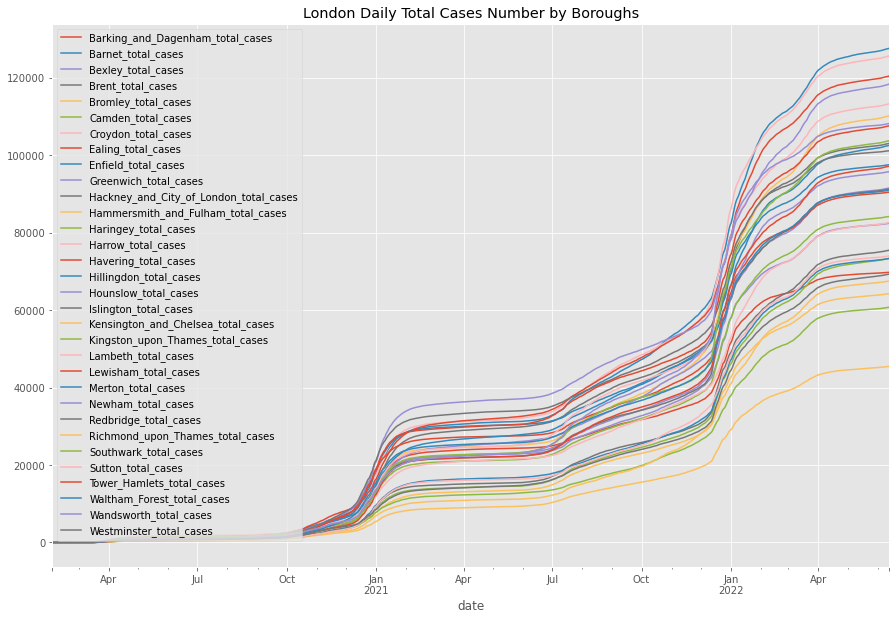

In [121]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Daily Total Cases Number by Boroughs')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
cd2.plot(kind='line', x='date', y='Barking_and_Dagenham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Barnet_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bexley_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Brent_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bromley_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Camden_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Croydon_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Ealing_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Enfield_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Greenwich_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hackney_and_City_of_London_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Haringey_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Harrow_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Havering_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hillingdon_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hounslow_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Islington_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kensington_and_Chelsea_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kingston_upon_Thames_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lambeth_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lewisham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Merton_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Newham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Redbridge_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Richmond_upon_Thames_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Southwark_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Sutton_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Tower_Hamlets_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Waltham_Forest_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Wandsworth_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Westminster_total_cases', ax=axes);

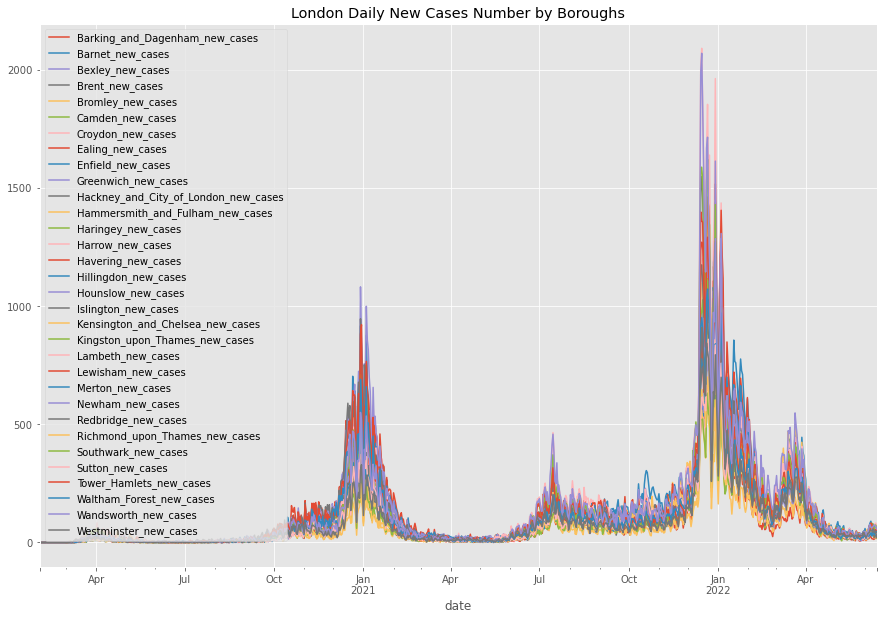

In [108]:
plt.figure(figsize=(15,10))
plt.title('London Daily New Cases Number by Boroughs')

axes = plt.gca()

cd2.plot(kind='line', x='date', y='Barking_and_Dagenham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Barnet_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bexley_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Brent_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bromley_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Camden_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Croydon_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Ealing_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Enfield_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Greenwich_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hackney_and_City_of_London_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Haringey_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Harrow_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Havering_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hillingdon_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hounslow_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Islington_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kensington_and_Chelsea_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kingston_upon_Thames_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lambeth_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lewisham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Merton_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Newham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Redbridge_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Richmond_upon_Thames_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Southwark_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Sutton_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Tower_Hamlets_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Waltham_Forest_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Wandsworth_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Westminster_new_cases', ax=axes);

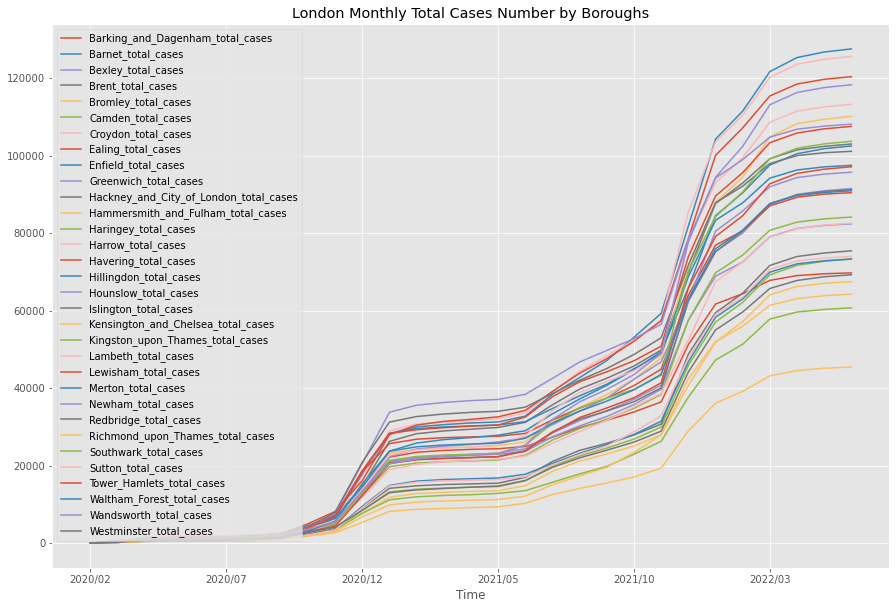

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Total Cases Number by Boroughs')

axes = plt.gca()

cd3.plot(kind='line', x='Time', y='Barking_and_Dagenham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Barnet_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bexley_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Brent_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bromley_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Camden_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Croydon_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Ealing_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Enfield_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Greenwich_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hackney_and_City_of_London_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hammersmith_and_Fulham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Haringey_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Harrow_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Havering_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hillingdon_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hounslow_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Islington_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kensington_and_Chelsea_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kingston_upon_Thames_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lambeth_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lewisham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Merton_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Newham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Redbridge_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Richmond_upon_Thames_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Southwark_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Sutton_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Tower_Hamlets_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Waltham_Forest_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Wandsworth_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Westminster_total_cases', ax=axes);

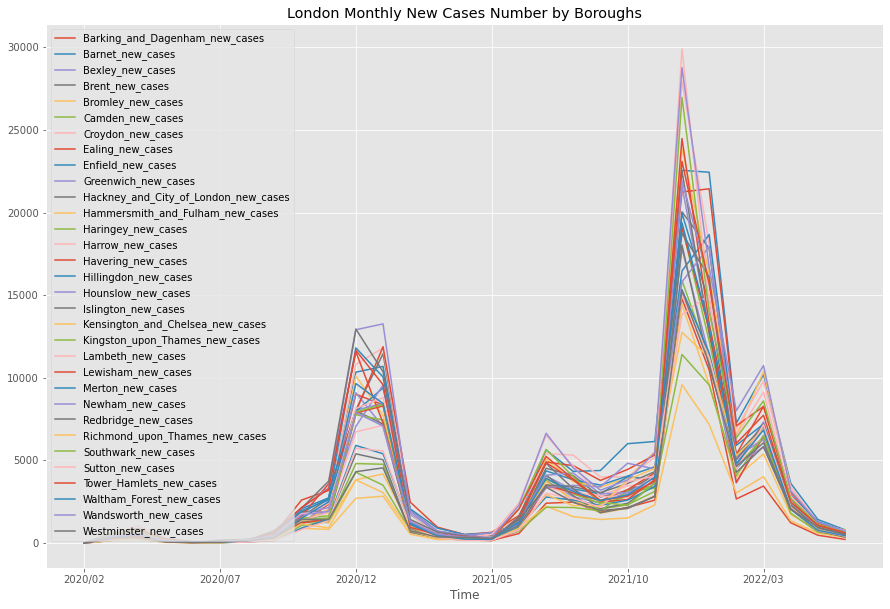

In [110]:
plt.figure(figsize=(15,10))
plt.title('London Monthly New Cases Number by Boroughs')

axes = plt.gca()

cd3.plot(kind='line', x='Time', y='Barking_and_Dagenham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Barnet_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bexley_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Brent_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bromley_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Camden_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Croydon_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Ealing_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Enfield_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Greenwich_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hackney_and_City_of_London_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hammersmith_and_Fulham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Haringey_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Harrow_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Havering_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hillingdon_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hounslow_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Islington_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kensington_and_Chelsea_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kingston_upon_Thames_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lambeth_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lewisham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Merton_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Newham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Redbridge_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Richmond_upon_Thames_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Southwark_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Sutton_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Tower_Hamlets_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Waltham_Forest_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Wandsworth_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Westminster_new_cases', ax=axes);

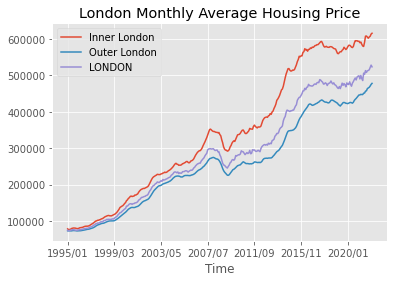

In [111]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Average Housing Price')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ap.plot(kind='line', x='Time', y='Inner London', ax=axes);
ap.plot(kind='line', x='Time', y='Outer London', ax=axes);
ap.plot(kind='line', x='Time', y='LONDON', ax=axes);

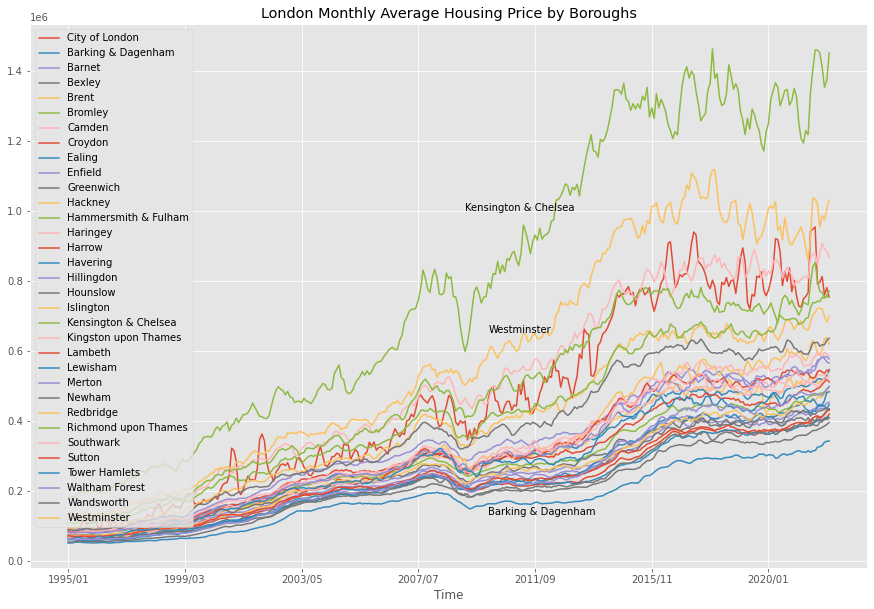

In [112]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Average Housing Price by Boroughs')
plt.text(170, 1000000, 'Kensington & Chelsea')
plt.text(180, 650000, 'Westminster')
plt.text(180, 130000, 'Barking & Dagenham')


# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ap.plot(kind='line', x='Time', y='City of London', ax=axes);
ap.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
ap.plot(kind='line', x='Time', y='Barnet', ax=axes);
ap.plot(kind='line', x='Time', y='Bexley', ax=axes);
ap.plot(kind='line', x='Time', y='Brent', ax=axes);
ap.plot(kind='line', x='Time', y='Bromley', ax=axes);
ap.plot(kind='line', x='Time', y='Camden', ax=axes);
ap.plot(kind='line', x='Time', y='Croydon', ax=axes);
ap.plot(kind='line', x='Time', y='Ealing', ax=axes);
ap.plot(kind='line', x='Time', y='Enfield', ax=axes);
ap.plot(kind='line', x='Time', y='Greenwich', ax=axes);
ap.plot(kind='line', x='Time', y='Hackney', ax=axes);
ap.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
ap.plot(kind='line', x='Time', y='Haringey', ax=axes);
ap.plot(kind='line', x='Time', y='Harrow', ax=axes);
ap.plot(kind='line', x='Time', y='Havering', ax=axes);
ap.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
ap.plot(kind='line', x='Time', y='Hounslow', ax=axes);
ap.plot(kind='line', x='Time', y='Islington', ax=axes);
ap.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
ap.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
ap.plot(kind='line', x='Time', y='Lambeth', ax=axes);
ap.plot(kind='line', x='Time', y='Lewisham', ax=axes);
ap.plot(kind='line', x='Time', y='Merton', ax=axes);
ap.plot(kind='line', x='Time', y='Newham', ax=axes);
ap.plot(kind='line', x='Time', y='Redbridge', ax=axes);
ap.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
ap.plot(kind='line', x='Time', y='Southwark', ax=axes);
ap.plot(kind='line', x='Time', y='Sutton', ax=axes);
ap.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
ap.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
ap.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
ap.plot(kind='line', x='Time', y='Westminster', ax=axes);

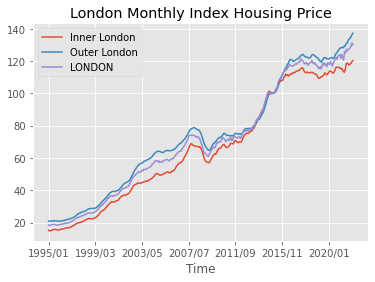

In [113]:
# Setup matplotlib
import matplotlib.pyplot as plt
plt.title('London Monthly Index Housing Price')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ip.plot(kind='line', x='Time', y='Inner London', ax=axes);
ip.plot(kind='line', x='Time', y='Outer London', ax=axes);
ip.plot(kind='line', x='Time', y='LONDON', ax=axes);

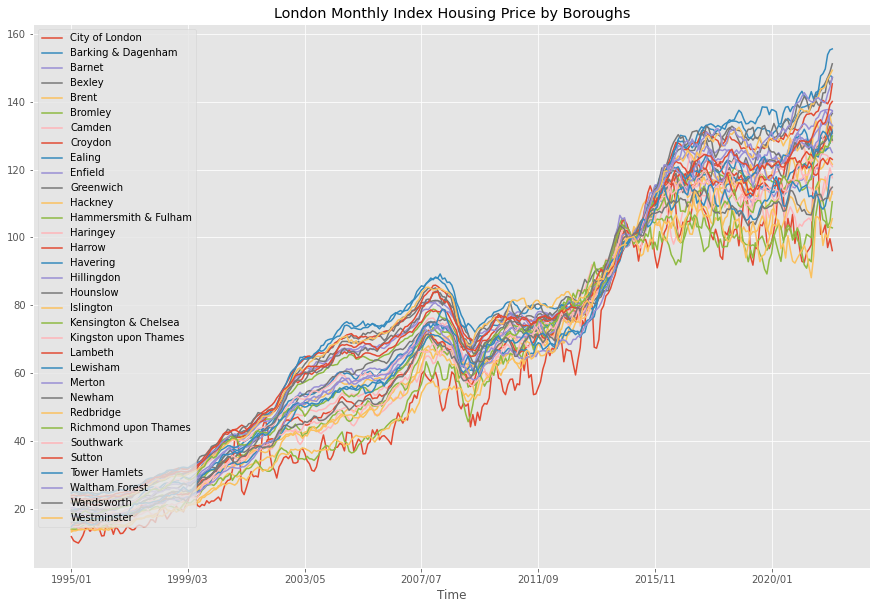

In [114]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Index Housing Price by Boroughs')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ip.plot(kind='line', x='Time', y='City of London', ax=axes);
ip.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
ip.plot(kind='line', x='Time', y='Barnet', ax=axes);
ip.plot(kind='line', x='Time', y='Bexley', ax=axes);
ip.plot(kind='line', x='Time', y='Brent', ax=axes);
ip.plot(kind='line', x='Time', y='Bromley', ax=axes);
ip.plot(kind='line', x='Time', y='Camden', ax=axes);
ip.plot(kind='line', x='Time', y='Croydon', ax=axes);
ip.plot(kind='line', x='Time', y='Ealing', ax=axes);
ip.plot(kind='line', x='Time', y='Enfield', ax=axes);
ip.plot(kind='line', x='Time', y='Greenwich', ax=axes);
ip.plot(kind='line', x='Time', y='Hackney', ax=axes);
ip.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
ip.plot(kind='line', x='Time', y='Haringey', ax=axes);
ip.plot(kind='line', x='Time', y='Harrow', ax=axes);
ip.plot(kind='line', x='Time', y='Havering', ax=axes);
ip.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
ip.plot(kind='line', x='Time', y='Hounslow', ax=axes);
ip.plot(kind='line', x='Time', y='Islington', ax=axes);
ip.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
ip.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
ip.plot(kind='line', x='Time', y='Lambeth', ax=axes);
ip.plot(kind='line', x='Time', y='Lewisham', ax=axes);
ip.plot(kind='line', x='Time', y='Merton', ax=axes);
ip.plot(kind='line', x='Time', y='Newham', ax=axes);
ip.plot(kind='line', x='Time', y='Redbridge', ax=axes);
ip.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
ip.plot(kind='line', x='Time', y='Southwark', ax=axes);
ip.plot(kind='line', x='Time', y='Sutton', ax=axes);
ip.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
ip.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
ip.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
ip.plot(kind='line', x='Time', y='Westminster', ax=axes);

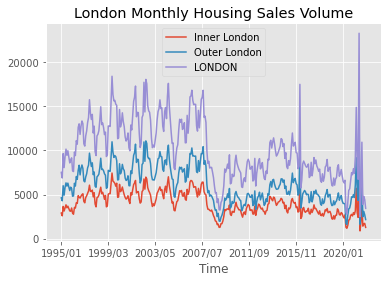

In [115]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Housing Sales Volume')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
sv.plot(kind='line', x='Time', y='Inner London', ax=axes);
sv.plot(kind='line', x='Time', y='Outer London', ax=axes);
sv.plot(kind='line', x='Time', y='LONDON', ax=axes);

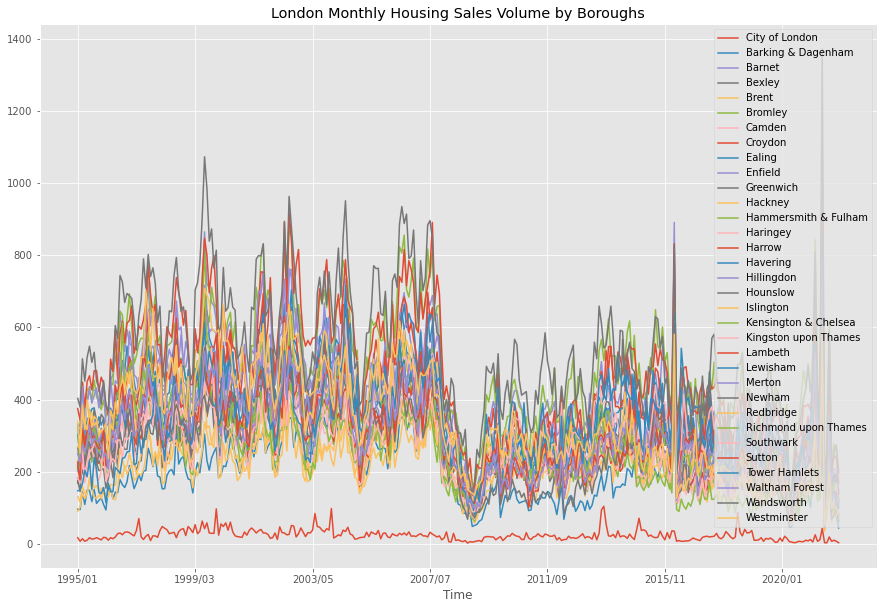

In [116]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Housing Sales Volume by Boroughs')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
sv.plot(kind='line', x='Time', y='City of London', ax=axes);
sv.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
sv.plot(kind='line', x='Time', y='Barnet', ax=axes);
sv.plot(kind='line', x='Time', y='Bexley', ax=axes);
sv.plot(kind='line', x='Time', y='Brent', ax=axes);
sv.plot(kind='line', x='Time', y='Bromley', ax=axes);
sv.plot(kind='line', x='Time', y='Camden', ax=axes);
sv.plot(kind='line', x='Time', y='Croydon', ax=axes);
sv.plot(kind='line', x='Time', y='Ealing', ax=axes);
sv.plot(kind='line', x='Time', y='Enfield', ax=axes);
sv.plot(kind='line', x='Time', y='Greenwich', ax=axes);
sv.plot(kind='line', x='Time', y='Hackney', ax=axes);
sv.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
sv.plot(kind='line', x='Time', y='Haringey', ax=axes);
sv.plot(kind='line', x='Time', y='Harrow', ax=axes);
sv.plot(kind='line', x='Time', y='Havering', ax=axes);
sv.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
sv.plot(kind='line', x='Time', y='Hounslow', ax=axes);
sv.plot(kind='line', x='Time', y='Islington', ax=axes);
sv.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
sv.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
sv.plot(kind='line', x='Time', y='Lambeth', ax=axes);
sv.plot(kind='line', x='Time', y='Lewisham', ax=axes);
sv.plot(kind='line', x='Time', y='Merton', ax=axes);
sv.plot(kind='line', x='Time', y='Newham', ax=axes);
sv.plot(kind='line', x='Time', y='Redbridge', ax=axes);
sv.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
sv.plot(kind='line', x='Time', y='Southwark', ax=axes);
sv.plot(kind='line', x='Time', y='Sutton', ax=axes);
sv.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
sv.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
sv.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
sv.plot(kind='line', x='Time', y='Westminster', ax=axes);

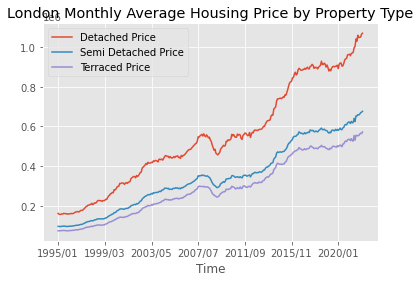

In [117]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Average Housing Price by Property Type')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
bt.plot(kind='line', x='Time', y='Detached Price', ax=axes);
bt.plot(kind='line', x='Time', y='Semi Detached Price', ax=axes);
bt.plot(kind='line', x='Time', y='Terraced Price', ax=axes);

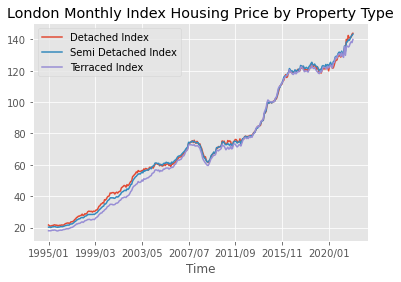

In [118]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Index Housing Price by Property Type')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
bt.plot(kind='line', x='Time', y='Detached Index', ax=axes);
bt.plot(kind='line', x='Time', y='Semi Detached Index', ax=axes);
bt.plot(kind='line', x='Time', y='Terraced Index', ax=axes);

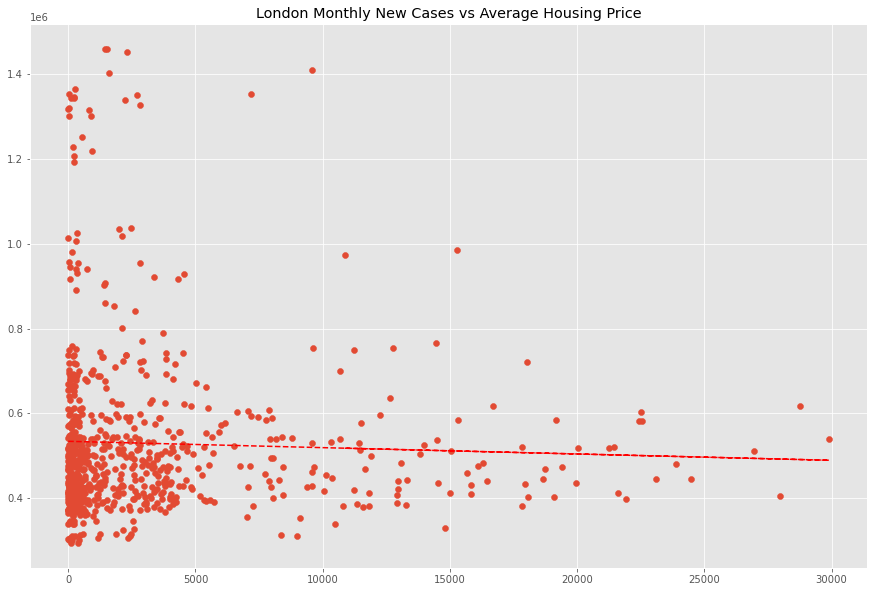

In [124]:
plt.figure(figsize=(15,10))
x = df['new_cases']
y = df['average_price']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Average Housing Price')
plt.show()

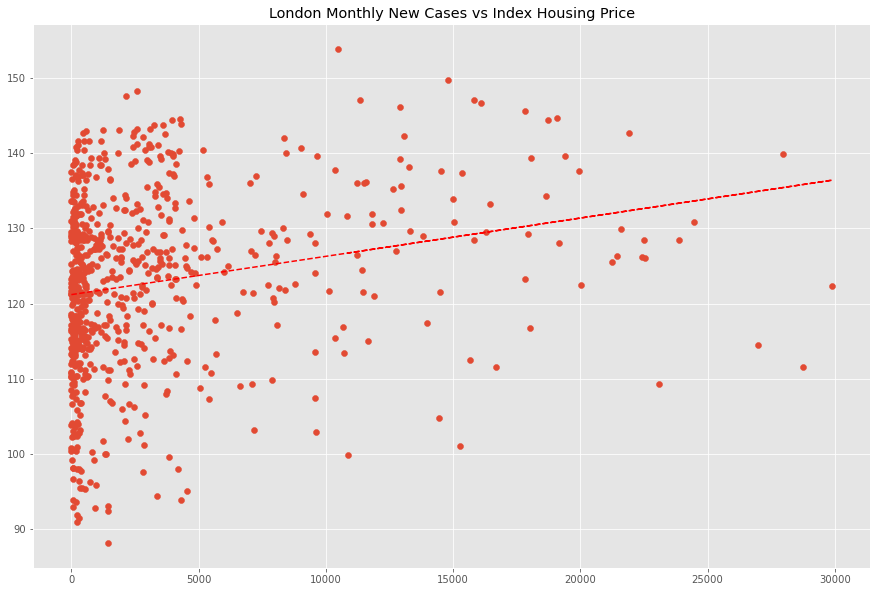

In [125]:
plt.figure(figsize=(15,10))
x = df['new_cases']
y = df['index_price']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Index Housing Price')
plt.show()

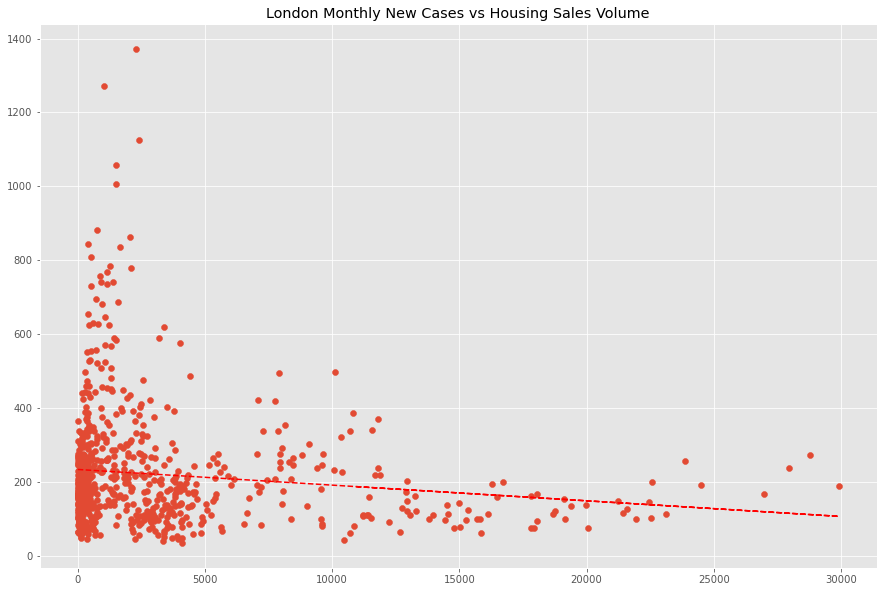

In [126]:
plt.figure(figsize=(15,10))
x = df['new_cases']
y = df['sales_volume']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Housing Sales Volume')
plt.show()

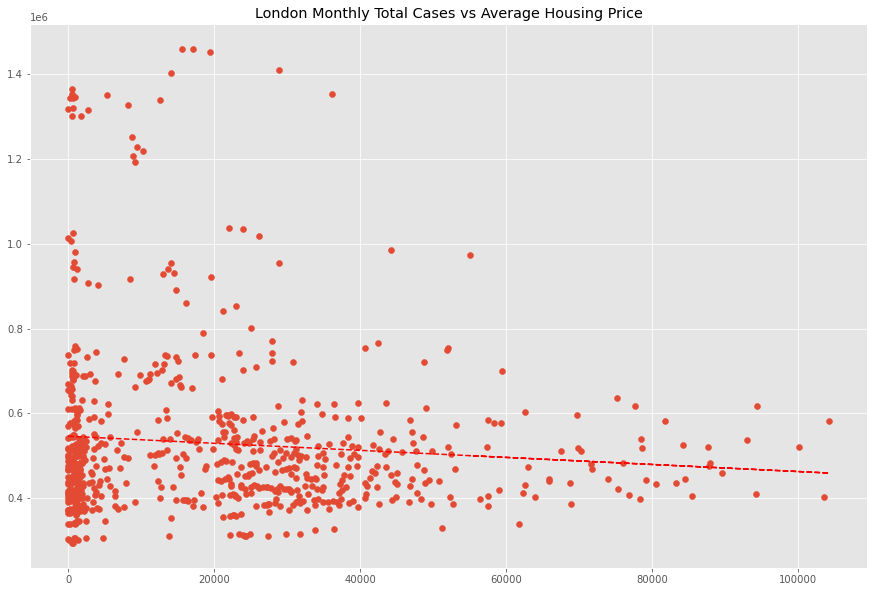

In [127]:
plt.figure(figsize=(15,10))
x = df['total_cases']
y = df['average_price']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Average Housing Price')
plt.show()

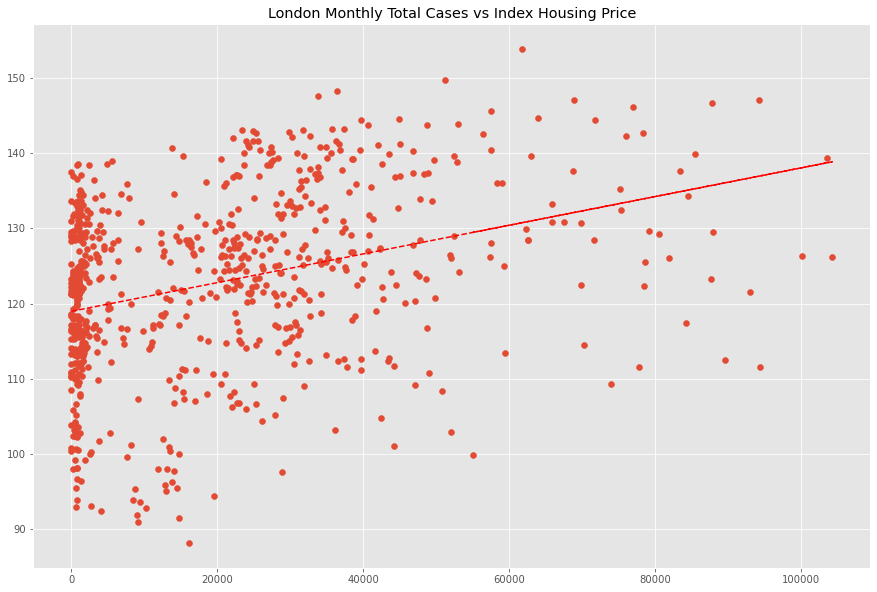

In [128]:
plt.figure(figsize=(15,10))
x = df['total_cases']
y = df['index_price']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Index Housing Price')
plt.show()

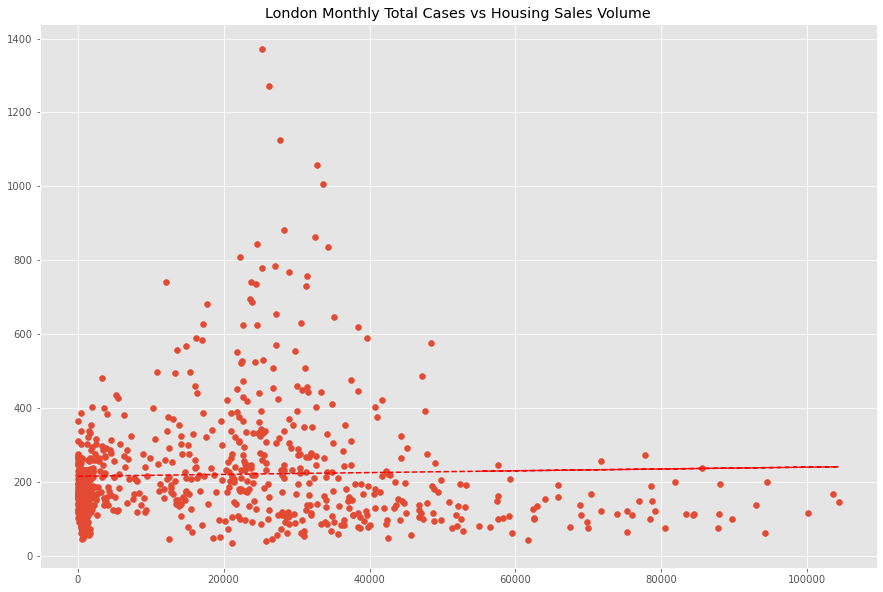

In [129]:
plt.figure(figsize=(15,10))
x = df['total_cases']
y = df['sales_volume']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Housing Sales Volume')
plt.show()